In [1]:
import glob
import csv
import sys, os.path
import time
import sklearn
import torch
from torch import optim, nn
from torch.utils.data import DataLoader
from torchvision import transforms
#from torch.utils.tensorboard import SummaryWriter
#from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our modules
import sys
sys.path.append('.')
sys.path.append('..')

from vae import configs, train, plot_utils, models
from vae.data import build_dataloader
from vae.latent_spaces import dimensionality_reduction, plot_spaces
from vae.reconstructions import plot_reconstructions
from vae.models import model_utils

In [3]:
classes = ['violin', 'viola', 'cello', 'double-bass',
                'clarinet', 'bass-clarinet', 'saxophone', 'flute', 'oboe', 'bassoon', 'contrabassoon',
                'cor-anglais', 'french-horn', 'trombone', 'trumpet', 'tuba', 'english-horn',
                'guitar', 'mandolin', 'banjo', 'chromatic-percussion']

chromatic_perc = ['agogo-bells', 'banana shaker', 'bass drum', 'bell-tree', 'cabasa',
                        'castanets', 'chinese-cymbal', 'clash-cymbals', 'cowbell', 'djembe', 'djundjun', 'flexatone', 'guiro',
                        'lemon-shaker',  'motor-horn',  'ratchet', 'sheeps-toenails', 'sizzle-cymbal', 'sleigh-bells', 'snare-drum',
                        'spring-coil', 'squeaker', 'strawberry-shaker', 'surdo', 'suspended-cymbal', 'swanee-whistle',
                        'tambourine', 'tam-tam', 'tenor drum', 'thai gong', 'tom-toms', 'train-whistle', 'triangle',
                        'vibraslap', 'washboard', 'whip', 'wind-chimes', 'woodblock']

labels_list = [i for i in range(len(classes))]


In [4]:
labels_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Number of files in the training dataset: 11630
Number of files in the validation dataset: 1357


  0%|          | 0/727 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
MultiheadAttention-1  [[-1, 2, 128], [-1, 22, 22]]               0
            Linear-2                   [-1, 64]         180,288
Total params: 180,288
Trainable params: 180,288
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.94
Params size (MB): 0.69
Estimated Total Size (MB): 1.64
----------------------------------------------------------------
None
Start training model on cuda ...
Epoch: 0


100%|██████████| 727/727 [00:02<00:00, 283.46it/s]

training_avg_loss=3.72



val_avg_loss=3.01



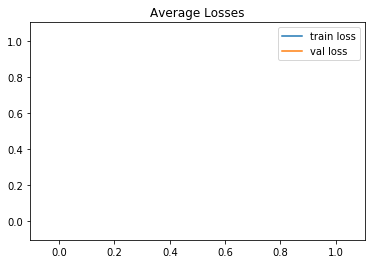

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3.34s
Epoch: 1


100%|██████████| 727/727 [00:02<00:00, 279.99it/s]

training_avg_loss=2.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.84

Epoch: 2


100%|██████████| 727/727 [00:02<00:00, 274.25it/s]

training_avg_loss=2.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.78

Epoch: 3


100%|██████████| 727/727 [00:02<00:00, 282.65it/s]

training_avg_loss=2.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.62

Epoch: 4


100%|██████████| 727/727 [00:02<00:00, 281.62it/s]

training_avg_loss=2.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.48

Epoch: 5


100%|██████████| 727/727 [00:02<00:00, 278.26it/s]

training_avg_loss=2.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.41

Epoch: 6


100%|██████████| 727/727 [00:02<00:00, 286.10it/s]

training_avg_loss=2.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.36

Epoch: 7


100%|██████████| 727/727 [00:02<00:00, 281.52it/s]

training_avg_loss=2.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.34

Epoch: 8


100%|██████████| 727/727 [00:02<00:00, 285.31it/s]

training_avg_loss=2.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.32

Epoch: 9


100%|██████████| 727/727 [00:02<00:00, 279.65it/s]

training_avg_loss=2.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.31

Epoch: 10


100%|██████████| 727/727 [00:02<00:00, 285.63it/s]

training_avg_loss=2.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.29

Epoch: 11


100%|██████████| 727/727 [00:02<00:00, 275.28it/s]

training_avg_loss=2.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.28

Epoch: 12


100%|██████████| 727/727 [00:02<00:00, 281.32it/s]

training_avg_loss=2.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.27

Epoch: 13


100%|██████████| 727/727 [00:02<00:00, 280.50it/s]

training_avg_loss=2.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.26

Epoch: 14


100%|██████████| 727/727 [00:02<00:00, 276.62it/s]

training_avg_loss=2.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.25

Epoch: 15


100%|██████████| 727/727 [00:02<00:00, 268.63it/s]

training_avg_loss=2.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.24

Epoch: 16


100%|██████████| 727/727 [00:02<00:00, 280.77it/s]

training_avg_loss=2.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.24

Epoch: 17


100%|██████████| 727/727 [00:02<00:00, 285.21it/s]

training_avg_loss=2.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.23

Epoch: 18


100%|██████████| 727/727 [00:02<00:00, 284.22it/s]

training_avg_loss=2.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.23

Epoch: 19


100%|██████████| 727/727 [00:02<00:00, 285.81it/s]

training_avg_loss=2.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.22

Epoch: 20


100%|██████████| 727/727 [00:02<00:00, 279.78it/s]

training_avg_loss=2.19



val_avg_loss=2.21



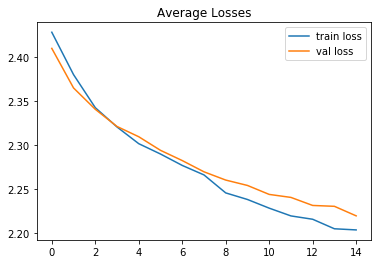

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 67.18s
Epoch: 21


100%|██████████| 727/727 [00:02<00:00, 270.05it/s]

training_avg_loss=2.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.21

Epoch: 22


100%|██████████| 727/727 [00:02<00:00, 284.37it/s]

training_avg_loss=2.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.21

Epoch: 23


100%|██████████| 727/727 [00:02<00:00, 269.46it/s]

training_avg_loss=2.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.20

Epoch: 24


100%|██████████| 727/727 [00:02<00:00, 275.59it/s]

training_avg_loss=2.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.20

Epoch: 25


100%|██████████| 727/727 [00:02<00:00, 285.39it/s]

training_avg_loss=2.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.20

Epoch: 26


100%|██████████| 727/727 [00:02<00:00, 283.58it/s]

training_avg_loss=2.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.19

Epoch: 27


100%|██████████| 727/727 [00:02<00:00, 281.59it/s]

training_avg_loss=2.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.18

Epoch: 28


100%|██████████| 727/727 [00:02<00:00, 278.01it/s]

training_avg_loss=2.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.19

Epoch: 29


100%|██████████| 727/727 [00:02<00:00, 281.23it/s]

training_avg_loss=2.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.18

Epoch: 30


100%|██████████| 727/727 [00:02<00:00, 284.26it/s]

training_avg_loss=2.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.18

Epoch: 31


100%|██████████| 727/727 [00:02<00:00, 275.84it/s]

training_avg_loss=2.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.18

Epoch: 32


100%|██████████| 727/727 [00:02<00:00, 282.98it/s]

training_avg_loss=2.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.17

Epoch: 33


100%|██████████| 727/727 [00:02<00:00, 285.03it/s]

training_avg_loss=2.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.16

Epoch: 34


100%|██████████| 727/727 [00:02<00:00, 273.78it/s]

training_avg_loss=2.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.16

Epoch: 35


100%|██████████| 727/727 [00:02<00:00, 283.50it/s]

training_avg_loss=2.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.16

Epoch: 36


100%|██████████| 727/727 [00:02<00:00, 282.06it/s]

training_avg_loss=2.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.15

Epoch: 37


100%|██████████| 727/727 [00:02<00:00, 275.35it/s]

training_avg_loss=2.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.14

Epoch: 38


100%|██████████| 727/727 [00:02<00:00, 283.66it/s]

training_avg_loss=2.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.14

Epoch: 39


100%|██████████| 727/727 [00:02<00:00, 271.96it/s]

training_avg_loss=1.98




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.13

Epoch: 40


100%|██████████| 727/727 [00:02<00:00, 273.40it/s]

training_avg_loss=1.97



val_avg_loss=2.13



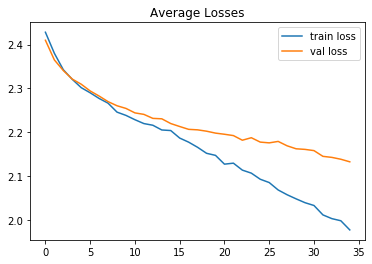

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 131.24s
Epoch: 41


100%|██████████| 727/727 [00:02<00:00, 280.17it/s]

training_avg_loss=1.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.12

Epoch: 42


100%|██████████| 727/727 [00:02<00:00, 279.87it/s]

training_avg_loss=1.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.11

Epoch: 43


100%|██████████| 727/727 [00:02<00:00, 282.40it/s]

training_avg_loss=1.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.11

Epoch: 44


100%|██████████| 727/727 [00:02<00:00, 281.81it/s]

training_avg_loss=1.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.10

Epoch: 45


100%|██████████| 727/727 [00:02<00:00, 279.11it/s]

training_avg_loss=1.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.09

Epoch: 46


100%|██████████| 727/727 [00:02<00:00, 279.13it/s]

training_avg_loss=1.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.08

Epoch: 47


100%|██████████| 727/727 [00:02<00:00, 272.23it/s]

training_avg_loss=1.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.08

Epoch: 48


100%|██████████| 727/727 [00:02<00:00, 265.25it/s]

training_avg_loss=1.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.07

Epoch: 49


100%|██████████| 727/727 [00:02<00:00, 279.73it/s]

training_avg_loss=1.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.05

Epoch: 50


100%|██████████| 727/727 [00:02<00:00, 278.22it/s]

training_avg_loss=1.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.05

Epoch: 51


100%|██████████| 727/727 [00:02<00:00, 279.08it/s]

training_avg_loss=1.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.04

Epoch: 52


100%|██████████| 727/727 [00:02<00:00, 284.20it/s]

training_avg_loss=1.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.03

Epoch: 53


100%|██████████| 727/727 [00:02<00:00, 283.16it/s]

training_avg_loss=1.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.03

Epoch: 54


100%|██████████| 727/727 [00:02<00:00, 279.51it/s]

training_avg_loss=1.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.01

Epoch: 55


100%|██████████| 727/727 [00:02<00:00, 329.35it/s]

training_avg_loss=1.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2.01

Epoch: 56


100%|██████████| 727/727 [00:02<00:00, 279.47it/s]

training_avg_loss=1.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.99

Epoch: 57


100%|██████████| 727/727 [00:02<00:00, 279.57it/s]

training_avg_loss=1.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.99

Epoch: 58


100%|██████████| 727/727 [00:02<00:00, 272.32it/s]

training_avg_loss=1.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.98

Epoch: 59


100%|██████████| 727/727 [00:02<00:00, 281.77it/s]

training_avg_loss=1.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.96

Epoch: 60


100%|██████████| 727/727 [00:02<00:00, 275.13it/s]

training_avg_loss=1.68



val_avg_loss=1.96



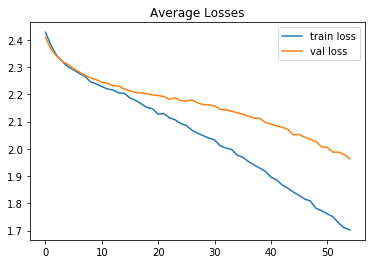

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 195.56s
Epoch: 61


100%|██████████| 727/727 [00:02<00:00, 280.76it/s]

training_avg_loss=1.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.95

Epoch: 62


100%|██████████| 727/727 [00:02<00:00, 273.95it/s]

training_avg_loss=1.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.94

Epoch: 63


100%|██████████| 727/727 [00:02<00:00, 283.81it/s]

training_avg_loss=1.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.93

Epoch: 64


100%|██████████| 727/727 [00:02<00:00, 275.73it/s]

training_avg_loss=1.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.92

Epoch: 65


100%|██████████| 727/727 [00:02<00:00, 273.84it/s]

training_avg_loss=1.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.91

Epoch: 66


100%|██████████| 727/727 [00:02<00:00, 281.02it/s]

training_avg_loss=1.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.90

Epoch: 67


100%|██████████| 727/727 [00:02<00:00, 282.79it/s]

training_avg_loss=1.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.90

Epoch: 68


100%|██████████| 727/727 [00:02<00:00, 282.42it/s]

training_avg_loss=1.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.88

Epoch: 69


100%|██████████| 727/727 [00:02<00:00, 285.12it/s]

training_avg_loss=1.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.88

Epoch: 70


100%|██████████| 727/727 [00:02<00:00, 273.15it/s]

training_avg_loss=1.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.87

Epoch: 71


100%|██████████| 727/727 [00:02<00:00, 274.59it/s]

training_avg_loss=1.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.87

Epoch: 72


100%|██████████| 727/727 [00:02<00:00, 281.59it/s]

training_avg_loss=1.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.86

Epoch: 73


100%|██████████| 727/727 [00:02<00:00, 280.31it/s]

training_avg_loss=1.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 74


100%|██████████| 727/727 [00:02<00:00, 278.02it/s]

training_avg_loss=1.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 75


100%|██████████| 727/727 [00:02<00:00, 275.13it/s]

training_avg_loss=1.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 76


100%|██████████| 727/727 [00:02<00:00, 279.61it/s]

training_avg_loss=1.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 77


100%|██████████| 727/727 [00:02<00:00, 275.70it/s]

training_avg_loss=1.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 78


100%|██████████| 727/727 [00:02<00:00, 273.24it/s]

training_avg_loss=1.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 79


100%|██████████| 727/727 [00:02<00:00, 279.08it/s]

training_avg_loss=1.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 80


100%|██████████| 727/727 [00:02<00:00, 264.58it/s]

training_avg_loss=1.47



val_avg_loss=1.79



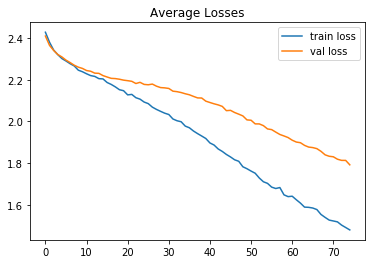

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 259.96s
Epoch: 81


100%|██████████| 727/727 [00:02<00:00, 282.96it/s]

training_avg_loss=1.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 82


100%|██████████| 727/727 [00:02<00:00, 278.85it/s]

training_avg_loss=1.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 83


100%|██████████| 727/727 [00:02<00:00, 272.16it/s]

training_avg_loss=1.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 84


100%|██████████| 727/727 [00:02<00:00, 280.55it/s]

training_avg_loss=1.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 85


100%|██████████| 727/727 [00:02<00:00, 272.85it/s]

training_avg_loss=1.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 86


100%|██████████| 727/727 [00:02<00:00, 276.96it/s]

training_avg_loss=1.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 87


100%|██████████| 727/727 [00:02<00:00, 273.29it/s]

training_avg_loss=1.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 88


100%|██████████| 727/727 [00:02<00:00, 276.90it/s]

training_avg_loss=1.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 89


100%|██████████| 727/727 [00:02<00:00, 272.01it/s]

training_avg_loss=1.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 90


100%|██████████| 727/727 [00:02<00:00, 273.30it/s]

training_avg_loss=1.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 91


100%|██████████| 727/727 [00:02<00:00, 269.91it/s]

training_avg_loss=1.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 92


100%|██████████| 727/727 [00:02<00:00, 274.90it/s]

training_avg_loss=1.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 93


100%|██████████| 727/727 [00:02<00:00, 271.99it/s]

training_avg_loss=1.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 94


100%|██████████| 727/727 [00:02<00:00, 276.77it/s]

training_avg_loss=1.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 95


100%|██████████| 727/727 [00:02<00:00, 274.87it/s]

training_avg_loss=1.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 96


100%|██████████| 727/727 [00:02<00:00, 275.91it/s]

training_avg_loss=1.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 97


100%|██████████| 727/727 [00:02<00:00, 276.78it/s]

training_avg_loss=1.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 98


100%|██████████| 727/727 [00:02<00:00, 276.08it/s]

training_avg_loss=1.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 99


100%|██████████| 727/727 [00:02<00:00, 273.24it/s]

training_avg_loss=1.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 100


100%|██████████| 727/727 [00:02<00:00, 275.71it/s]

training_avg_loss=1.32



val_avg_loss=1.69



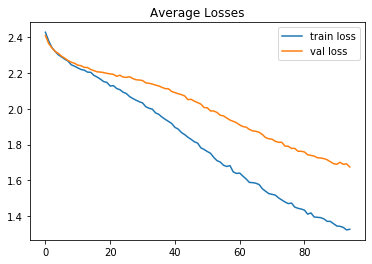

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 324.90s
Epoch: 101


100%|██████████| 727/727 [00:02<00:00, 274.88it/s]

training_avg_loss=1.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 102


100%|██████████| 727/727 [00:02<00:00, 274.43it/s]

training_avg_loss=1.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 103


100%|██████████| 727/727 [00:02<00:00, 274.00it/s]

training_avg_loss=1.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 104


100%|██████████| 727/727 [00:02<00:00, 272.78it/s]

training_avg_loss=1.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 105


100%|██████████| 727/727 [00:02<00:00, 278.06it/s]

training_avg_loss=1.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 106


100%|██████████| 727/727 [00:02<00:00, 275.91it/s]

training_avg_loss=1.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 107


100%|██████████| 727/727 [00:02<00:00, 275.19it/s]

training_avg_loss=1.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 108


100%|██████████| 727/727 [00:02<00:00, 271.64it/s]

training_avg_loss=1.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 109


100%|██████████| 727/727 [00:02<00:00, 269.41it/s]

training_avg_loss=1.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 110


100%|██████████| 727/727 [00:02<00:00, 271.55it/s]

training_avg_loss=1.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 111


100%|██████████| 727/727 [00:02<00:00, 275.93it/s]

training_avg_loss=1.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 112


100%|██████████| 727/727 [00:02<00:00, 270.81it/s]

training_avg_loss=1.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 113


100%|██████████| 727/727 [00:02<00:00, 275.29it/s]

training_avg_loss=1.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 114


100%|██████████| 727/727 [00:02<00:00, 273.13it/s]

training_avg_loss=1.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 115


100%|██████████| 727/727 [00:02<00:00, 271.68it/s]

training_avg_loss=1.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 116


100%|██████████| 727/727 [00:02<00:00, 273.43it/s]

training_avg_loss=1.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 117


100%|██████████| 727/727 [00:02<00:00, 274.51it/s]

training_avg_loss=1.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 118


100%|██████████| 727/727 [00:02<00:00, 271.47it/s]

training_avg_loss=1.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 119


100%|██████████| 727/727 [00:02<00:00, 273.94it/s]

training_avg_loss=1.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 120


100%|██████████| 727/727 [00:02<00:00, 275.92it/s]

training_avg_loss=1.21



val_avg_loss=1.61



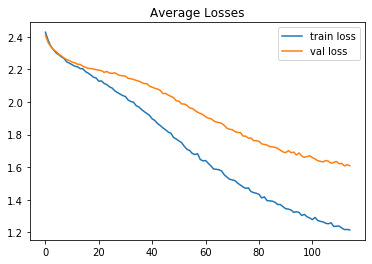

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 390.09s
Epoch: 121


100%|██████████| 727/727 [00:02<00:00, 274.06it/s]

training_avg_loss=1.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 122


100%|██████████| 727/727 [00:02<00:00, 273.30it/s]

training_avg_loss=1.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 123


100%|██████████| 727/727 [00:02<00:00, 272.09it/s]

training_avg_loss=1.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 124


100%|██████████| 727/727 [00:02<00:00, 269.49it/s]

training_avg_loss=1.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 125


100%|██████████| 727/727 [00:02<00:00, 273.21it/s]

training_avg_loss=1.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 126


100%|██████████| 727/727 [00:02<00:00, 269.20it/s]

training_avg_loss=1.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 127


100%|██████████| 727/727 [00:02<00:00, 272.60it/s]

training_avg_loss=1.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 128


100%|██████████| 727/727 [00:02<00:00, 272.17it/s]

training_avg_loss=1.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 129


100%|██████████| 727/727 [00:02<00:00, 276.67it/s]

training_avg_loss=1.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 130


100%|██████████| 727/727 [00:02<00:00, 267.69it/s]

training_avg_loss=1.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 131


100%|██████████| 727/727 [00:02<00:00, 278.57it/s]

training_avg_loss=1.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 132


100%|██████████| 727/727 [00:02<00:00, 281.74it/s]

training_avg_loss=1.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 133


100%|██████████| 727/727 [00:02<00:00, 276.86it/s]

training_avg_loss=1.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 134


100%|██████████| 727/727 [00:02<00:00, 279.69it/s]

training_avg_loss=1.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 135


100%|██████████| 727/727 [00:02<00:00, 270.03it/s]

training_avg_loss=1.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 136


100%|██████████| 727/727 [00:02<00:00, 268.15it/s]

training_avg_loss=1.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 137


100%|██████████| 727/727 [00:02<00:00, 272.82it/s]

training_avg_loss=1.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 138


100%|██████████| 727/727 [00:02<00:00, 271.88it/s]

training_avg_loss=1.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 139


100%|██████████| 727/727 [00:02<00:00, 269.75it/s]

training_avg_loss=1.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 140


100%|██████████| 727/727 [00:02<00:00, 276.88it/s]

training_avg_loss=1.13



val_avg_loss=1.58



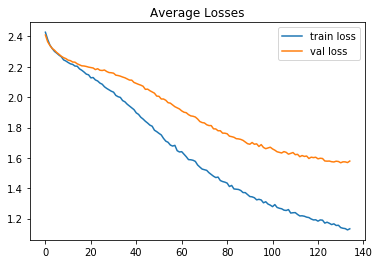

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 455.63s
Epoch: 141


100%|██████████| 727/727 [00:02<00:00, 267.73it/s]

training_avg_loss=1.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 142


100%|██████████| 727/727 [00:02<00:00, 283.50it/s]

training_avg_loss=1.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 143


100%|██████████| 727/727 [00:02<00:00, 272.59it/s]

training_avg_loss=1.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 144


100%|██████████| 727/727 [00:02<00:00, 283.32it/s]

training_avg_loss=1.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 145


100%|██████████| 727/727 [00:02<00:00, 275.73it/s]

training_avg_loss=1.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 146


100%|██████████| 727/727 [00:02<00:00, 271.58it/s]

training_avg_loss=1.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 147


100%|██████████| 727/727 [00:02<00:00, 271.30it/s]

training_avg_loss=1.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 148


100%|██████████| 727/727 [00:02<00:00, 273.20it/s]

training_avg_loss=1.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 149


100%|██████████| 727/727 [00:02<00:00, 274.44it/s]

training_avg_loss=1.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 150


100%|██████████| 727/727 [00:02<00:00, 271.12it/s]

training_avg_loss=1.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 151


100%|██████████| 727/727 [00:02<00:00, 270.49it/s]

training_avg_loss=1.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 152


100%|██████████| 727/727 [00:02<00:00, 270.46it/s]

training_avg_loss=1.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 153


100%|██████████| 727/727 [00:02<00:00, 271.98it/s]

training_avg_loss=1.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 154


100%|██████████| 727/727 [00:02<00:00, 272.17it/s]

training_avg_loss=1.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 155


100%|██████████| 727/727 [00:02<00:00, 270.11it/s]

training_avg_loss=1.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 156


100%|██████████| 727/727 [00:02<00:00, 272.52it/s]

training_avg_loss=1.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 157


100%|██████████| 727/727 [00:02<00:00, 271.28it/s]

training_avg_loss=1.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 158


100%|██████████| 727/727 [00:02<00:00, 270.95it/s]

training_avg_loss=1.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 159


100%|██████████| 727/727 [00:02<00:00, 273.21it/s]

training_avg_loss=1.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 160


100%|██████████| 727/727 [00:02<00:00, 270.91it/s]

training_avg_loss=1.05



val_avg_loss=1.53



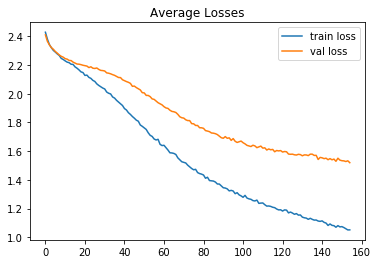

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 521.20s
Epoch: 161


100%|██████████| 727/727 [00:02<00:00, 267.94it/s]

training_avg_loss=1.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 162


100%|██████████| 727/727 [00:02<00:00, 271.63it/s]

training_avg_loss=1.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 163


100%|██████████| 727/727 [00:02<00:00, 272.59it/s]

training_avg_loss=1.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 164


100%|██████████| 727/727 [00:02<00:00, 271.57it/s]

training_avg_loss=1.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 165


100%|██████████| 727/727 [00:02<00:00, 266.13it/s]

training_avg_loss=1.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 166


100%|██████████| 727/727 [00:02<00:00, 279.62it/s]

training_avg_loss=1.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 167


100%|██████████| 727/727 [00:02<00:00, 273.94it/s]

training_avg_loss=1.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 168


100%|██████████| 727/727 [00:02<00:00, 276.79it/s]

training_avg_loss=1.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 169


100%|██████████| 727/727 [00:02<00:00, 272.41it/s]

training_avg_loss=1.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 170


100%|██████████| 727/727 [00:02<00:00, 280.47it/s]

training_avg_loss=1.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 171


100%|██████████| 727/727 [00:02<00:00, 277.69it/s]

training_avg_loss=1.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 172


100%|██████████| 727/727 [00:02<00:00, 276.48it/s]

training_avg_loss=1.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 173


100%|██████████| 727/727 [00:02<00:00, 274.60it/s]

training_avg_loss=1.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 174


100%|██████████| 727/727 [00:02<00:00, 275.69it/s]

training_avg_loss=1.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 175


100%|██████████| 727/727 [00:02<00:00, 273.00it/s]

training_avg_loss=0.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 176


100%|██████████| 727/727 [00:02<00:00, 281.21it/s]

training_avg_loss=1.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 177


100%|██████████| 727/727 [00:02<00:00, 272.73it/s]

training_avg_loss=0.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 178


100%|██████████| 727/727 [00:02<00:00, 271.73it/s]

training_avg_loss=1.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 179


100%|██████████| 727/727 [00:02<00:00, 267.78it/s]

training_avg_loss=1.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 180


100%|██████████| 727/727 [00:02<00:00, 266.44it/s]

training_avg_loss=0.98



val_avg_loss=1.53



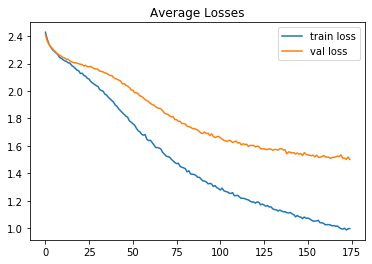

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 586.76s
Epoch: 181


100%|██████████| 727/727 [00:02<00:00, 270.76it/s]

training_avg_loss=0.98




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 182


100%|██████████| 727/727 [00:02<00:00, 263.69it/s]

training_avg_loss=0.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 183


100%|██████████| 727/727 [00:02<00:00, 261.70it/s]

training_avg_loss=0.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 184


100%|██████████| 727/727 [00:02<00:00, 267.35it/s]

training_avg_loss=0.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 185


100%|██████████| 727/727 [00:02<00:00, 267.36it/s]

training_avg_loss=0.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 186


100%|██████████| 727/727 [00:02<00:00, 268.24it/s]

training_avg_loss=0.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 187


100%|██████████| 727/727 [00:02<00:00, 270.45it/s]

training_avg_loss=0.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 188


100%|██████████| 727/727 [00:02<00:00, 267.80it/s]

training_avg_loss=0.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 189


100%|██████████| 727/727 [00:02<00:00, 269.63it/s]

training_avg_loss=0.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 190


100%|██████████| 727/727 [00:02<00:00, 269.20it/s]

training_avg_loss=0.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 191


100%|██████████| 727/727 [00:02<00:00, 270.11it/s]

training_avg_loss=0.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 192


100%|██████████| 727/727 [00:02<00:00, 270.09it/s]

training_avg_loss=0.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 193


100%|██████████| 727/727 [00:02<00:00, 260.93it/s]

training_avg_loss=0.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 194


100%|██████████| 727/727 [00:02<00:00, 266.24it/s]

training_avg_loss=0.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 195


100%|██████████| 727/727 [00:02<00:00, 270.54it/s]

training_avg_loss=0.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 196


100%|██████████| 727/727 [00:02<00:00, 269.44it/s]

training_avg_loss=0.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 197


100%|██████████| 727/727 [00:02<00:00, 268.75it/s]

training_avg_loss=0.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 198


100%|██████████| 727/727 [00:02<00:00, 269.01it/s]

training_avg_loss=0.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 199


100%|██████████| 727/727 [00:02<00:00, 272.21it/s]

training_avg_loss=0.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 200


100%|██████████| 727/727 [00:02<00:00, 268.91it/s]

training_avg_loss=0.92



val_avg_loss=1.51



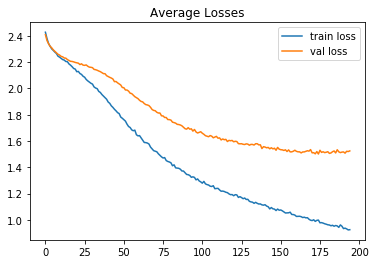

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 653.24s
Epoch: 201


100%|██████████| 727/727 [00:02<00:00, 272.23it/s]

training_avg_loss=0.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 202


100%|██████████| 727/727 [00:02<00:00, 266.28it/s]

training_avg_loss=0.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 203


100%|██████████| 727/727 [00:02<00:00, 263.39it/s]

training_avg_loss=0.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 204


100%|██████████| 727/727 [00:02<00:00, 262.37it/s]

training_avg_loss=0.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 205


100%|██████████| 727/727 [00:02<00:00, 264.94it/s]

training_avg_loss=0.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 206


100%|██████████| 727/727 [00:02<00:00, 269.54it/s]

training_avg_loss=0.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 207


100%|██████████| 727/727 [00:02<00:00, 262.77it/s]

training_avg_loss=0.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 208


100%|██████████| 727/727 [00:02<00:00, 265.65it/s]

training_avg_loss=0.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 209


100%|██████████| 727/727 [00:02<00:00, 266.39it/s]

training_avg_loss=0.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 210


100%|██████████| 727/727 [00:02<00:00, 267.90it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 211


100%|██████████| 727/727 [00:02<00:00, 261.23it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 212


100%|██████████| 727/727 [00:02<00:00, 267.81it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 213


100%|██████████| 727/727 [00:02<00:00, 270.39it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 214


100%|██████████| 727/727 [00:02<00:00, 267.83it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 215


100%|██████████| 727/727 [00:02<00:00, 272.35it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 216


100%|██████████| 727/727 [00:02<00:00, 266.25it/s]

training_avg_loss=0.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 217


100%|██████████| 727/727 [00:02<00:00, 268.56it/s]

training_avg_loss=0.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 218


100%|██████████| 727/727 [00:02<00:00, 269.72it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 219


100%|██████████| 727/727 [00:02<00:00, 268.62it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 220


100%|██████████| 727/727 [00:02<00:00, 268.57it/s]

training_avg_loss=0.88



val_avg_loss=1.51



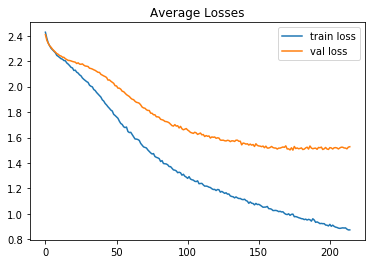

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 719.85s
Epoch: 221


100%|██████████| 727/727 [00:02<00:00, 268.78it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 222


100%|██████████| 727/727 [00:02<00:00, 270.06it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 223


100%|██████████| 727/727 [00:02<00:00, 264.64it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 224


100%|██████████| 727/727 [00:02<00:00, 269.55it/s]

training_avg_loss=0.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 225


100%|██████████| 727/727 [00:02<00:00, 268.32it/s]

training_avg_loss=0.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 226


100%|██████████| 727/727 [00:02<00:00, 267.27it/s]

training_avg_loss=0.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 227


100%|██████████| 727/727 [00:02<00:00, 267.78it/s]

training_avg_loss=0.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 228


100%|██████████| 727/727 [00:02<00:00, 271.77it/s]

training_avg_loss=0.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 229


100%|██████████| 727/727 [00:02<00:00, 262.13it/s]

training_avg_loss=0.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 230


100%|██████████| 727/727 [00:02<00:00, 261.68it/s]

training_avg_loss=0.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 231


100%|██████████| 727/727 [00:02<00:00, 259.98it/s]

training_avg_loss=0.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 232


100%|██████████| 727/727 [00:02<00:00, 269.04it/s]

training_avg_loss=0.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 233


100%|██████████| 727/727 [00:02<00:00, 267.44it/s]

training_avg_loss=0.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 234


100%|██████████| 727/727 [00:02<00:00, 267.06it/s]

training_avg_loss=0.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 235


100%|██████████| 727/727 [00:02<00:00, 268.97it/s]

training_avg_loss=0.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 236


100%|██████████| 727/727 [00:02<00:00, 261.56it/s]

training_avg_loss=0.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 237


100%|██████████| 727/727 [00:02<00:00, 264.92it/s]

training_avg_loss=0.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 238


100%|██████████| 727/727 [00:02<00:00, 264.99it/s]

training_avg_loss=0.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 239


100%|██████████| 727/727 [00:02<00:00, 274.57it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 240


100%|██████████| 727/727 [00:02<00:00, 264.38it/s]

training_avg_loss=0.82



val_avg_loss=1.52



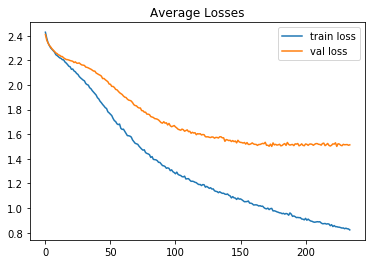

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 786.79s
Epoch: 241


100%|██████████| 727/727 [00:02<00:00, 271.58it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 242


100%|██████████| 727/727 [00:02<00:00, 264.92it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 243


100%|██████████| 727/727 [00:02<00:00, 268.12it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 244


100%|██████████| 727/727 [00:02<00:00, 267.43it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 245


100%|██████████| 727/727 [00:02<00:00, 267.43it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 246


100%|██████████| 727/727 [00:02<00:00, 265.70it/s]

training_avg_loss=0.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 247


100%|██████████| 727/727 [00:02<00:00, 267.89it/s]

training_avg_loss=0.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 248


100%|██████████| 727/727 [00:02<00:00, 268.16it/s]

training_avg_loss=0.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 249


100%|██████████| 727/727 [00:02<00:00, 269.45it/s]

training_avg_loss=0.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 250


100%|██████████| 727/727 [00:02<00:00, 260.95it/s]

training_avg_loss=0.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 251


100%|██████████| 727/727 [00:02<00:00, 267.62it/s]

training_avg_loss=0.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 252


100%|██████████| 727/727 [00:02<00:00, 264.43it/s]

training_avg_loss=0.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 253


100%|██████████| 727/727 [00:02<00:00, 269.82it/s]

training_avg_loss=0.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 254


100%|██████████| 727/727 [00:02<00:00, 271.00it/s]

training_avg_loss=0.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 255


100%|██████████| 727/727 [00:02<00:00, 270.25it/s]

training_avg_loss=0.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 256


100%|██████████| 727/727 [00:02<00:00, 272.21it/s]

training_avg_loss=0.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 257


100%|██████████| 727/727 [00:02<00:00, 265.04it/s]

training_avg_loss=0.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 258


100%|██████████| 727/727 [00:02<00:00, 267.60it/s]

training_avg_loss=0.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 259


100%|██████████| 727/727 [00:02<00:00, 275.68it/s]

training_avg_loss=0.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 260


100%|██████████| 727/727 [00:02<00:00, 269.04it/s]

training_avg_loss=0.78



val_avg_loss=1.50



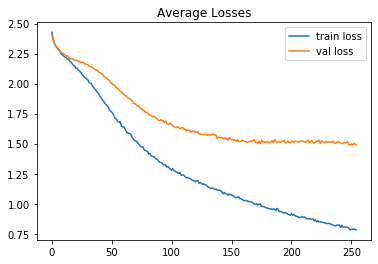

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 853.17s
Epoch: 261


100%|██████████| 727/727 [00:02<00:00, 267.91it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 262


100%|██████████| 727/727 [00:02<00:00, 273.48it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 263


100%|██████████| 727/727 [00:02<00:00, 269.18it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 264


100%|██████████| 727/727 [00:02<00:00, 267.15it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 265


100%|██████████| 727/727 [00:02<00:00, 266.68it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 266


100%|██████████| 727/727 [00:02<00:00, 268.35it/s]

training_avg_loss=0.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 267


100%|██████████| 727/727 [00:02<00:00, 268.26it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 268


100%|██████████| 727/727 [00:02<00:00, 271.48it/s]

training_avg_loss=0.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 269


100%|██████████| 727/727 [00:02<00:00, 266.25it/s]

training_avg_loss=0.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 270


100%|██████████| 727/727 [00:02<00:00, 261.72it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 271


100%|██████████| 727/727 [00:02<00:00, 269.70it/s]

training_avg_loss=0.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 272


100%|██████████| 727/727 [00:02<00:00, 266.39it/s]

training_avg_loss=0.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 273


100%|██████████| 727/727 [00:02<00:00, 268.91it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 274


100%|██████████| 727/727 [00:02<00:00, 268.11it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 275


100%|██████████| 727/727 [00:02<00:00, 268.75it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 276


100%|██████████| 727/727 [00:02<00:00, 264.83it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 277


100%|██████████| 727/727 [00:02<00:00, 269.56it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 278


100%|██████████| 727/727 [00:02<00:00, 268.57it/s]

training_avg_loss=0.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 279


100%|██████████| 727/727 [00:02<00:00, 264.93it/s]

training_avg_loss=0.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 280


100%|██████████| 727/727 [00:02<00:00, 269.13it/s]

training_avg_loss=0.73



val_avg_loss=1.48



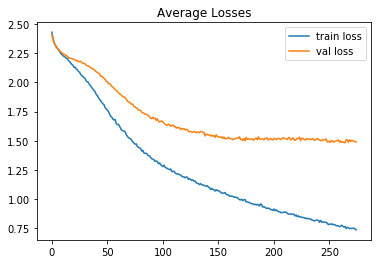

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 919.72s
Epoch: 281


100%|██████████| 727/727 [00:02<00:00, 266.09it/s]

training_avg_loss=0.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 282


100%|██████████| 727/727 [00:02<00:00, 267.73it/s]

training_avg_loss=0.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 283


100%|██████████| 727/727 [00:02<00:00, 267.19it/s]

training_avg_loss=0.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 284


100%|██████████| 727/727 [00:02<00:00, 262.83it/s]

training_avg_loss=0.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 285


100%|██████████| 727/727 [00:02<00:00, 266.98it/s]

training_avg_loss=0.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 286


100%|██████████| 727/727 [00:02<00:00, 269.67it/s]

training_avg_loss=0.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 287


100%|██████████| 727/727 [00:02<00:00, 268.98it/s]

training_avg_loss=0.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 288


100%|██████████| 727/727 [00:02<00:00, 267.76it/s]

training_avg_loss=0.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 289


100%|██████████| 727/727 [00:02<00:00, 270.33it/s]

training_avg_loss=0.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 290


100%|██████████| 727/727 [00:02<00:00, 268.97it/s]

training_avg_loss=0.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 291


100%|██████████| 727/727 [00:02<00:00, 268.97it/s]

training_avg_loss=0.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 292


100%|██████████| 727/727 [00:02<00:00, 271.34it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 293


100%|██████████| 727/727 [00:02<00:00, 335.96it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 294


100%|██████████| 727/727 [00:02<00:00, 265.77it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 295


100%|██████████| 727/727 [00:02<00:00, 266.76it/s]

training_avg_loss=0.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 296


100%|██████████| 727/727 [00:02<00:00, 261.73it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 297


100%|██████████| 727/727 [00:02<00:00, 271.16it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 298


100%|██████████| 727/727 [00:02<00:00, 270.82it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 299


100%|██████████| 727/727 [00:02<00:00, 267.17it/s]

training_avg_loss=0.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 300


100%|██████████| 727/727 [00:02<00:00, 260.52it/s]

training_avg_loss=0.70



val_avg_loss=1.49



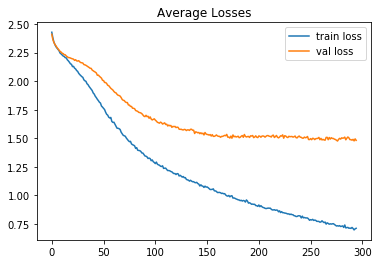

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 986.45s
Epoch: 301


100%|██████████| 727/727 [00:02<00:00, 264.53it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 302


100%|██████████| 727/727 [00:02<00:00, 268.64it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 303


100%|██████████| 727/727 [00:02<00:00, 266.33it/s]

training_avg_loss=0.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 304


100%|██████████| 727/727 [00:02<00:00, 260.71it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 305


100%|██████████| 727/727 [00:02<00:00, 269.75it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 306


100%|██████████| 727/727 [00:02<00:00, 271.94it/s]

training_avg_loss=0.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 307


100%|██████████| 727/727 [00:02<00:00, 261.85it/s]

training_avg_loss=0.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 308


100%|██████████| 727/727 [00:02<00:00, 267.71it/s]

training_avg_loss=0.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 309


100%|██████████| 727/727 [00:02<00:00, 264.72it/s]

training_avg_loss=0.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 310


100%|██████████| 727/727 [00:02<00:00, 268.45it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 311


100%|██████████| 727/727 [00:02<00:00, 270.63it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 312


100%|██████████| 727/727 [00:02<00:00, 271.38it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 313


100%|██████████| 727/727 [00:02<00:00, 266.43it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 314


100%|██████████| 727/727 [00:02<00:00, 263.75it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 315


100%|██████████| 727/727 [00:02<00:00, 260.98it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 316


100%|██████████| 727/727 [00:02<00:00, 266.84it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 317


100%|██████████| 727/727 [00:02<00:00, 269.39it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 318


100%|██████████| 727/727 [00:02<00:00, 262.95it/s]

training_avg_loss=0.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 319


100%|██████████| 727/727 [00:02<00:00, 267.70it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 320


100%|██████████| 727/727 [00:02<00:00, 265.51it/s]

training_avg_loss=0.67



val_avg_loss=1.46



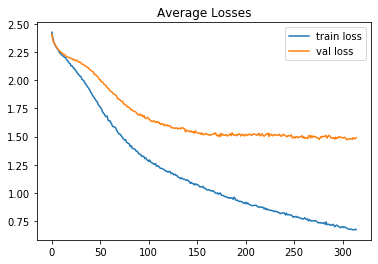

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1053.29s
Epoch: 321


100%|██████████| 727/727 [00:02<00:00, 260.97it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 322


100%|██████████| 727/727 [00:02<00:00, 271.89it/s]

training_avg_loss=0.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 323


100%|██████████| 727/727 [00:02<00:00, 271.68it/s]

training_avg_loss=0.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 324


100%|██████████| 727/727 [00:02<00:00, 267.92it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 325


100%|██████████| 727/727 [00:02<00:00, 270.36it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 326


100%|██████████| 727/727 [00:02<00:00, 261.01it/s]

training_avg_loss=0.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 327


100%|██████████| 727/727 [00:02<00:00, 260.56it/s]

training_avg_loss=0.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 328


100%|██████████| 727/727 [00:02<00:00, 269.18it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 329


100%|██████████| 727/727 [00:02<00:00, 271.29it/s]

training_avg_loss=0.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 330


100%|██████████| 727/727 [00:02<00:00, 269.39it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 331


100%|██████████| 727/727 [00:02<00:00, 271.29it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 332


100%|██████████| 727/727 [00:02<00:00, 257.18it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 333


100%|██████████| 727/727 [00:02<00:00, 265.72it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 334


100%|██████████| 727/727 [00:02<00:00, 272.86it/s]

training_avg_loss=0.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 335


100%|██████████| 727/727 [00:02<00:00, 269.20it/s]

training_avg_loss=0.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 336


100%|██████████| 727/727 [00:02<00:00, 266.55it/s]

training_avg_loss=0.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 337


100%|██████████| 727/727 [00:02<00:00, 267.01it/s]

training_avg_loss=0.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 338


100%|██████████| 727/727 [00:02<00:00, 267.59it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 339


100%|██████████| 727/727 [00:02<00:00, 271.09it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 340


100%|██████████| 727/727 [00:02<00:00, 263.09it/s]

training_avg_loss=0.62



val_avg_loss=1.48



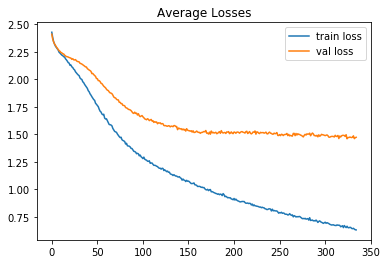

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1120.10s
Epoch: 341


100%|██████████| 727/727 [00:02<00:00, 267.10it/s]

training_avg_loss=0.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 342


100%|██████████| 727/727 [00:02<00:00, 265.28it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 343


100%|██████████| 727/727 [00:02<00:00, 269.53it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 344


100%|██████████| 727/727 [00:02<00:00, 266.59it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 345


100%|██████████| 727/727 [00:02<00:00, 267.09it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 346


100%|██████████| 727/727 [00:02<00:00, 269.88it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 347


100%|██████████| 727/727 [00:02<00:00, 265.93it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 348


100%|██████████| 727/727 [00:02<00:00, 265.30it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 349


100%|██████████| 727/727 [00:02<00:00, 267.84it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 350


100%|██████████| 727/727 [00:02<00:00, 270.00it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 351


100%|██████████| 727/727 [00:02<00:00, 270.32it/s]

training_avg_loss=0.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 352


100%|██████████| 727/727 [00:02<00:00, 268.88it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 353


100%|██████████| 727/727 [00:02<00:00, 265.06it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 354


100%|██████████| 727/727 [00:02<00:00, 260.35it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.45

Epoch: 355


100%|██████████| 727/727 [00:02<00:00, 271.45it/s]

training_avg_loss=0.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 356


100%|██████████| 727/727 [00:02<00:00, 266.40it/s]

training_avg_loss=0.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 357


100%|██████████| 727/727 [00:02<00:00, 258.89it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 358


100%|██████████| 727/727 [00:02<00:00, 268.97it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 359


100%|██████████| 727/727 [00:02<00:00, 268.22it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 360


100%|██████████| 727/727 [00:02<00:00, 268.39it/s]

training_avg_loss=0.59



val_avg_loss=1.45



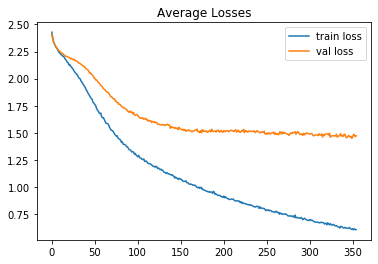

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1186.88s
Epoch: 361


100%|██████████| 727/727 [00:02<00:00, 263.30it/s]

training_avg_loss=0.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.45

Epoch: 362


100%|██████████| 727/727 [00:02<00:00, 264.57it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 363


100%|██████████| 727/727 [00:02<00:00, 265.99it/s]

training_avg_loss=0.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 364


100%|██████████| 727/727 [00:02<00:00, 268.45it/s]

training_avg_loss=0.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 365


100%|██████████| 727/727 [00:02<00:00, 267.97it/s]

training_avg_loss=0.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 366


100%|██████████| 727/727 [00:02<00:00, 266.71it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 367


100%|██████████| 727/727 [00:02<00:00, 265.61it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 368


100%|██████████| 727/727 [00:02<00:00, 265.38it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 369


100%|██████████| 727/727 [00:02<00:00, 267.37it/s]


training_avg_loss=0.60



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 370


100%|██████████| 727/727 [00:02<00:00, 266.68it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 371


100%|██████████| 727/727 [00:02<00:00, 263.45it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 372


100%|██████████| 727/727 [00:02<00:00, 268.52it/s]


training_avg_loss=0.58



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.46

Epoch: 373


100%|██████████| 727/727 [00:02<00:00, 265.32it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 374


100%|██████████| 727/727 [00:02<00:00, 258.36it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 375


100%|██████████| 727/727 [00:02<00:00, 257.85it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 376


100%|██████████| 727/727 [00:02<00:00, 267.58it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 377


100%|██████████| 727/727 [00:02<00:00, 265.02it/s]

training_avg_loss=0.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 378


100%|██████████| 727/727 [00:02<00:00, 266.42it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 379


100%|██████████| 727/727 [00:02<00:00, 267.10it/s]

training_avg_loss=0.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 380


100%|██████████| 727/727 [00:02<00:00, 260.24it/s]

training_avg_loss=0.58



val_avg_loss=1.49



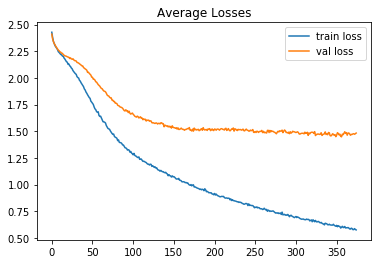

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1254.20s
Epoch: 381


100%|██████████| 727/727 [00:02<00:00, 263.82it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 382


100%|██████████| 727/727 [00:02<00:00, 264.34it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 383


100%|██████████| 727/727 [00:02<00:00, 260.62it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 384


100%|██████████| 727/727 [00:02<00:00, 265.39it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 385


100%|██████████| 727/727 [00:02<00:00, 265.03it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 386


100%|██████████| 727/727 [00:02<00:00, 260.98it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 387


100%|██████████| 727/727 [00:02<00:00, 265.47it/s]

training_avg_loss=0.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 388


100%|██████████| 727/727 [00:02<00:00, 264.33it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 389


100%|██████████| 727/727 [00:02<00:00, 262.20it/s]

training_avg_loss=0.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 390


100%|██████████| 727/727 [00:02<00:00, 266.91it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 391


100%|██████████| 727/727 [00:02<00:00, 265.82it/s]

training_avg_loss=0.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 392


100%|██████████| 727/727 [00:02<00:00, 265.32it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 393


100%|██████████| 727/727 [00:02<00:00, 269.95it/s]

training_avg_loss=0.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 394


100%|██████████| 727/727 [00:02<00:00, 260.70it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 395


100%|██████████| 727/727 [00:02<00:00, 268.68it/s]

training_avg_loss=0.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 396


100%|██████████| 727/727 [00:02<00:00, 262.08it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 397


100%|██████████| 727/727 [00:02<00:00, 268.58it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 398


100%|██████████| 727/727 [00:02<00:00, 265.07it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 399


100%|██████████| 727/727 [00:02<00:00, 265.23it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 400


100%|██████████| 727/727 [00:02<00:00, 257.95it/s]

training_avg_loss=0.56



val_avg_loss=1.48



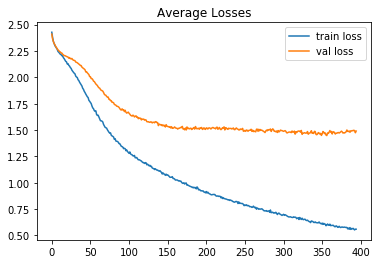

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1321.55s
Epoch: 401


100%|██████████| 727/727 [00:02<00:00, 263.50it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 402


100%|██████████| 727/727 [00:02<00:00, 260.95it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 403


100%|██████████| 727/727 [00:02<00:00, 265.92it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 404


100%|██████████| 727/727 [00:02<00:00, 264.40it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 405


100%|██████████| 727/727 [00:02<00:00, 255.57it/s]

training_avg_loss=0.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 406


100%|██████████| 727/727 [00:02<00:00, 262.39it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 407


100%|██████████| 727/727 [00:02<00:00, 267.19it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 408


100%|██████████| 727/727 [00:02<00:00, 266.80it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 409


100%|██████████| 727/727 [00:02<00:00, 263.35it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 410


100%|██████████| 727/727 [00:02<00:00, 255.24it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 411


100%|██████████| 727/727 [00:02<00:00, 260.73it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 412


100%|██████████| 727/727 [00:02<00:00, 253.07it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 413


100%|██████████| 727/727 [00:02<00:00, 264.19it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 414


100%|██████████| 727/727 [00:02<00:00, 267.80it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 415


100%|██████████| 727/727 [00:02<00:00, 262.82it/s]

training_avg_loss=0.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 416


100%|██████████| 727/727 [00:02<00:00, 268.48it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 417


100%|██████████| 727/727 [00:02<00:00, 261.75it/s]

training_avg_loss=0.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 418


100%|██████████| 727/727 [00:02<00:00, 258.37it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 419


100%|██████████| 727/727 [00:02<00:00, 256.85it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 420


100%|██████████| 727/727 [00:02<00:00, 265.50it/s]

training_avg_loss=0.53



val_avg_loss=1.50



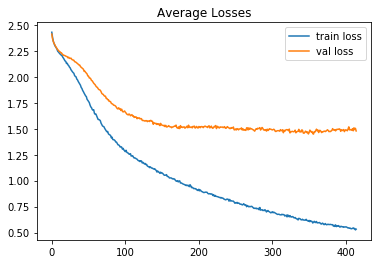

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1389.44s
Epoch: 421


100%|██████████| 727/727 [00:02<00:00, 264.96it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 422


100%|██████████| 727/727 [00:02<00:00, 264.79it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 423


100%|██████████| 727/727 [00:02<00:00, 260.85it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 424


100%|██████████| 727/727 [00:02<00:00, 259.30it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 425


100%|██████████| 727/727 [00:02<00:00, 255.67it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 426


100%|██████████| 727/727 [00:02<00:00, 261.46it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 427


100%|██████████| 727/727 [00:02<00:00, 261.15it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 428


100%|██████████| 727/727 [00:02<00:00, 260.96it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 429


100%|██████████| 727/727 [00:02<00:00, 260.55it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.47

Epoch: 430


100%|██████████| 727/727 [00:02<00:00, 263.03it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 431


100%|██████████| 727/727 [00:02<00:00, 259.66it/s]

training_avg_loss=0.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 432


100%|██████████| 727/727 [00:02<00:00, 258.28it/s]


training_avg_loss=0.53



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 433


100%|██████████| 727/727 [00:02<00:00, 257.34it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 434


100%|██████████| 727/727 [00:02<00:00, 259.27it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 435


100%|██████████| 727/727 [00:02<00:00, 258.91it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 436


100%|██████████| 727/727 [00:02<00:00, 260.11it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 437


100%|██████████| 727/727 [00:02<00:00, 261.30it/s]

training_avg_loss=0.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 438


100%|██████████| 727/727 [00:02<00:00, 260.07it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 439


100%|██████████| 727/727 [00:02<00:00, 261.90it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 440


100%|██████████| 727/727 [00:02<00:00, 261.52it/s]

training_avg_loss=0.51



val_avg_loss=1.51



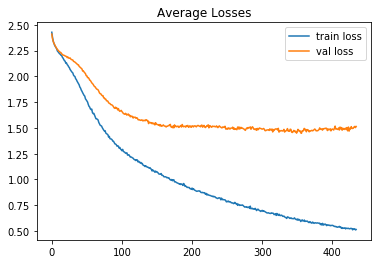

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1457.75s
Epoch: 441


100%|██████████| 727/727 [00:02<00:00, 253.66it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 442


100%|██████████| 727/727 [00:02<00:00, 257.21it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 443


100%|██████████| 727/727 [00:02<00:00, 258.79it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 444


100%|██████████| 727/727 [00:02<00:00, 258.73it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 445


100%|██████████| 727/727 [00:02<00:00, 257.81it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 446


100%|██████████| 727/727 [00:02<00:00, 258.47it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 447


100%|██████████| 727/727 [00:02<00:00, 257.37it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 448


100%|██████████| 727/727 [00:02<00:00, 326.54it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 449


100%|██████████| 727/727 [00:02<00:00, 258.32it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 450


100%|██████████| 727/727 [00:02<00:00, 259.27it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.48

Epoch: 451


100%|██████████| 727/727 [00:02<00:00, 261.15it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 452


100%|██████████| 727/727 [00:02<00:00, 254.66it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 453


100%|██████████| 727/727 [00:02<00:00, 258.68it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 454


100%|██████████| 727/727 [00:02<00:00, 261.01it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 455


100%|██████████| 727/727 [00:02<00:00, 261.12it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 456


100%|██████████| 727/727 [00:02<00:00, 261.27it/s]

training_avg_loss=0.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 457


100%|██████████| 727/727 [00:02<00:00, 254.73it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 458


100%|██████████| 727/727 [00:02<00:00, 260.52it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 459


100%|██████████| 727/727 [00:02<00:00, 262.64it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 460


100%|██████████| 727/727 [00:02<00:00, 258.38it/s]

training_avg_loss=0.49



val_avg_loss=1.49



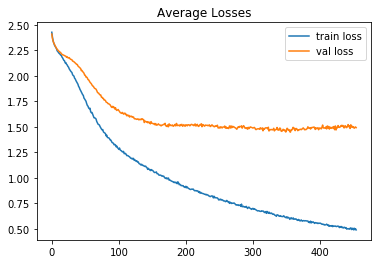

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1526.38s
Epoch: 461


100%|██████████| 727/727 [00:02<00:00, 255.98it/s]

training_avg_loss=0.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 462


100%|██████████| 727/727 [00:02<00:00, 259.82it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 463


100%|██████████| 727/727 [00:02<00:00, 258.40it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 464


100%|██████████| 727/727 [00:02<00:00, 257.14it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 465


100%|██████████| 727/727 [00:02<00:00, 263.77it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 466


100%|██████████| 727/727 [00:02<00:00, 261.20it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 467


100%|██████████| 727/727 [00:02<00:00, 257.58it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 468


100%|██████████| 727/727 [00:02<00:00, 258.65it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 469


100%|██████████| 727/727 [00:02<00:00, 259.48it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.49

Epoch: 470


100%|██████████| 727/727 [00:02<00:00, 261.20it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 471


100%|██████████| 727/727 [00:02<00:00, 256.82it/s]

training_avg_loss=0.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 472


100%|██████████| 727/727 [00:02<00:00, 255.59it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 473


100%|██████████| 727/727 [00:02<00:00, 262.62it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 474


100%|██████████| 727/727 [00:02<00:00, 255.77it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 475


100%|██████████| 727/727 [00:02<00:00, 258.71it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 476


100%|██████████| 727/727 [00:02<00:00, 256.40it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 477


100%|██████████| 727/727 [00:02<00:00, 259.96it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 478


100%|██████████| 727/727 [00:02<00:00, 258.92it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 479


100%|██████████| 727/727 [00:02<00:00, 257.32it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 480


100%|██████████| 727/727 [00:02<00:00, 260.67it/s]

training_avg_loss=0.46



val_avg_loss=1.52



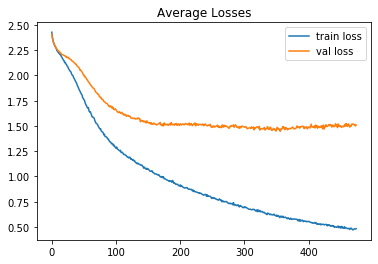

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1595.00s
Epoch: 481


100%|██████████| 727/727 [00:02<00:00, 260.16it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 482


100%|██████████| 727/727 [00:02<00:00, 256.76it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 483


100%|██████████| 727/727 [00:02<00:00, 253.89it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 484


100%|██████████| 727/727 [00:02<00:00, 261.36it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 485


100%|██████████| 727/727 [00:02<00:00, 254.89it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 486


100%|██████████| 727/727 [00:02<00:00, 257.82it/s]

training_avg_loss=0.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 487


100%|██████████| 727/727 [00:02<00:00, 254.40it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 488


100%|██████████| 727/727 [00:02<00:00, 259.54it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 489


100%|██████████| 727/727 [00:02<00:00, 257.31it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 490


100%|██████████| 727/727 [00:02<00:00, 258.83it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 491


100%|██████████| 727/727 [00:02<00:00, 258.98it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 492


100%|██████████| 727/727 [00:02<00:00, 256.97it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 493


100%|██████████| 727/727 [00:02<00:00, 258.82it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 494


100%|██████████| 727/727 [00:02<00:00, 319.25it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 495


100%|██████████| 727/727 [00:02<00:00, 253.79it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.50

Epoch: 496


100%|██████████| 727/727 [00:02<00:00, 258.47it/s]

training_avg_loss=0.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 497


100%|██████████| 727/727 [00:02<00:00, 265.67it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 498


100%|██████████| 727/727 [00:02<00:00, 256.69it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 499


100%|██████████| 727/727 [00:02<00:00, 257.89it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 500


100%|██████████| 727/727 [00:02<00:00, 261.36it/s]

training_avg_loss=0.46



val_avg_loss=1.57



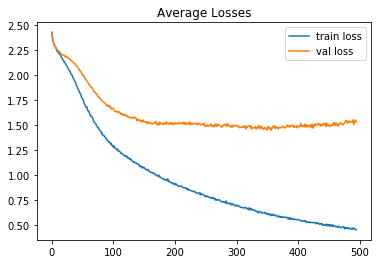

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1663.71s
Epoch: 501


100%|██████████| 727/727 [00:02<00:00, 265.91it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 502


100%|██████████| 727/727 [00:02<00:00, 258.73it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 503


100%|██████████| 727/727 [00:02<00:00, 253.97it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.51

Epoch: 504


100%|██████████| 727/727 [00:02<00:00, 263.56it/s]

training_avg_loss=0.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 505


100%|██████████| 727/727 [00:02<00:00, 253.84it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 506


100%|██████████| 727/727 [00:02<00:00, 258.43it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 507


100%|██████████| 727/727 [00:02<00:00, 259.56it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 508


100%|██████████| 727/727 [00:02<00:00, 251.85it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 509


100%|██████████| 727/727 [00:02<00:00, 256.78it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 510


100%|██████████| 727/727 [00:02<00:00, 256.44it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 511


100%|██████████| 727/727 [00:02<00:00, 253.26it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 512


100%|██████████| 727/727 [00:02<00:00, 258.18it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 513


100%|██████████| 727/727 [00:02<00:00, 325.65it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 514


100%|██████████| 727/727 [00:02<00:00, 253.85it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 515


100%|██████████| 727/727 [00:02<00:00, 255.45it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 516


100%|██████████| 727/727 [00:02<00:00, 263.38it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 517


100%|██████████| 727/727 [00:02<00:00, 261.92it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.52

Epoch: 518


100%|██████████| 727/727 [00:02<00:00, 251.79it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 519


100%|██████████| 727/727 [00:02<00:00, 250.07it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 520


100%|██████████| 727/727 [00:02<00:00, 251.76it/s]

training_avg_loss=0.44



val_avg_loss=1.56



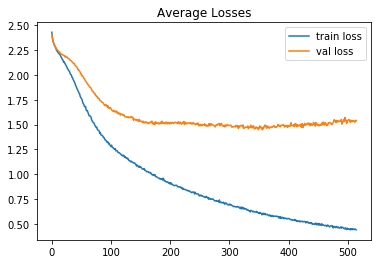

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1732.61s
Epoch: 521


100%|██████████| 727/727 [00:02<00:00, 264.63it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 522


100%|██████████| 727/727 [00:02<00:00, 254.16it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 523


100%|██████████| 727/727 [00:02<00:00, 311.11it/s]

training_avg_loss=0.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 524


100%|██████████| 727/727 [00:02<00:00, 260.33it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 525


100%|██████████| 727/727 [00:02<00:00, 259.75it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 526


100%|██████████| 727/727 [00:02<00:00, 254.92it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 527


100%|██████████| 727/727 [00:02<00:00, 253.13it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 528


100%|██████████| 727/727 [00:02<00:00, 259.08it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.53

Epoch: 529


100%|██████████| 727/727 [00:02<00:00, 263.52it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 530


100%|██████████| 727/727 [00:02<00:00, 256.27it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 531


100%|██████████| 727/727 [00:02<00:00, 258.14it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 532


100%|██████████| 727/727 [00:02<00:00, 249.47it/s]

training_avg_loss=0.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 533


100%|██████████| 727/727 [00:02<00:00, 257.60it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 534


100%|██████████| 727/727 [00:02<00:00, 260.68it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 535


100%|██████████| 727/727 [00:02<00:00, 261.79it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 536


100%|██████████| 727/727 [00:02<00:00, 257.01it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 537


100%|██████████| 727/727 [00:02<00:00, 255.37it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 538


100%|██████████| 727/727 [00:02<00:00, 258.23it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 539


100%|██████████| 727/727 [00:02<00:00, 256.64it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 540


100%|██████████| 727/727 [00:02<00:00, 254.97it/s]

training_avg_loss=0.43



val_avg_loss=1.55



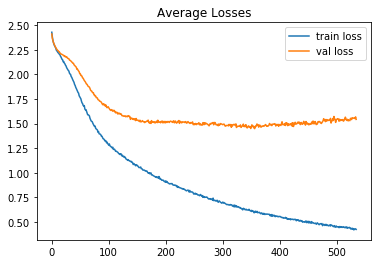

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1801.55s
Epoch: 541


100%|██████████| 727/727 [00:02<00:00, 257.24it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 542


100%|██████████| 727/727 [00:02<00:00, 251.79it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 543


100%|██████████| 727/727 [00:02<00:00, 256.45it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 544


100%|██████████| 727/727 [00:02<00:00, 253.98it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.54

Epoch: 545


100%|██████████| 727/727 [00:02<00:00, 255.49it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 546


100%|██████████| 727/727 [00:02<00:00, 254.52it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 547


100%|██████████| 727/727 [00:02<00:00, 257.11it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 548


100%|██████████| 727/727 [00:02<00:00, 259.57it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 549


100%|██████████| 727/727 [00:02<00:00, 249.36it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 550


100%|██████████| 727/727 [00:02<00:00, 254.41it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 551


100%|██████████| 727/727 [00:02<00:00, 259.19it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 552


100%|██████████| 727/727 [00:02<00:00, 257.81it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 553


100%|██████████| 727/727 [00:02<00:00, 262.23it/s]

training_avg_loss=0.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 554


100%|██████████| 727/727 [00:02<00:00, 250.42it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 555


100%|██████████| 727/727 [00:02<00:00, 258.73it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 556


100%|██████████| 727/727 [00:02<00:00, 255.28it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.55

Epoch: 557


100%|██████████| 727/727 [00:02<00:00, 258.00it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 558


100%|██████████| 727/727 [00:02<00:00, 259.85it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 559


100%|██████████| 727/727 [00:02<00:00, 257.21it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 560


100%|██████████| 727/727 [00:02<00:00, 257.07it/s]

training_avg_loss=0.40



val_avg_loss=1.56



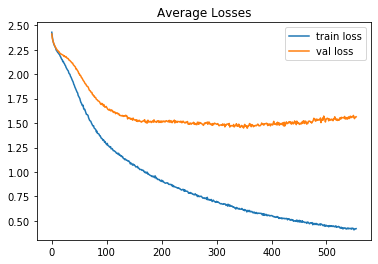

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1870.72s
Epoch: 561


100%|██████████| 727/727 [00:02<00:00, 251.61it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 562


100%|██████████| 727/727 [00:02<00:00, 257.14it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 563


100%|██████████| 727/727 [00:02<00:00, 254.79it/s]

training_avg_loss=0.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 564


100%|██████████| 727/727 [00:02<00:00, 262.48it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 565


100%|██████████| 727/727 [00:02<00:00, 257.68it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 566


100%|██████████| 727/727 [00:02<00:00, 257.56it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 567


100%|██████████| 727/727 [00:02<00:00, 258.16it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 568


100%|██████████| 727/727 [00:02<00:00, 256.82it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 569


100%|██████████| 727/727 [00:02<00:00, 255.09it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 570


100%|██████████| 727/727 [00:02<00:00, 258.81it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 571


100%|██████████| 727/727 [00:02<00:00, 256.30it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 572


100%|██████████| 727/727 [00:02<00:00, 260.27it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 573


100%|██████████| 727/727 [00:02<00:00, 261.29it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 574


100%|██████████| 727/727 [00:02<00:00, 262.77it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 575


100%|██████████| 727/727 [00:02<00:00, 262.69it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 576


100%|██████████| 727/727 [00:02<00:00, 254.00it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 577


100%|██████████| 727/727 [00:02<00:00, 256.36it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 578


100%|██████████| 727/727 [00:02<00:00, 258.39it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 579


100%|██████████| 727/727 [00:02<00:00, 254.45it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 580


100%|██████████| 727/727 [00:02<00:00, 260.97it/s]

training_avg_loss=0.40



val_avg_loss=1.57



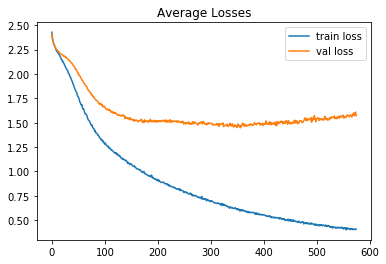

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 1939.63s
Epoch: 581


100%|██████████| 727/727 [00:02<00:00, 259.01it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 582


100%|██████████| 727/727 [00:02<00:00, 254.73it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 583


100%|██████████| 727/727 [00:02<00:00, 261.16it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 584


100%|██████████| 727/727 [00:02<00:00, 254.22it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 585


100%|██████████| 727/727 [00:02<00:00, 254.58it/s]

training_avg_loss=0.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 586


100%|██████████| 727/727 [00:02<00:00, 254.68it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.56

Epoch: 587


100%|██████████| 727/727 [00:02<00:00, 252.45it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 588


100%|██████████| 727/727 [00:02<00:00, 259.41it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 589


100%|██████████| 727/727 [00:02<00:00, 255.37it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 590


100%|██████████| 727/727 [00:02<00:00, 257.83it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.57

Epoch: 591


100%|██████████| 727/727 [00:02<00:00, 253.95it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 592


100%|██████████| 727/727 [00:02<00:00, 258.42it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 593


100%|██████████| 727/727 [00:02<00:00, 254.14it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 594


100%|██████████| 727/727 [00:02<00:00, 264.57it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 595


100%|██████████| 727/727 [00:02<00:00, 259.76it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 596


100%|██████████| 727/727 [00:02<00:00, 257.58it/s]

training_avg_loss=0.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 597


100%|██████████| 727/727 [00:02<00:00, 254.84it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 598


100%|██████████| 727/727 [00:02<00:00, 255.18it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 599


100%|██████████| 727/727 [00:02<00:00, 259.08it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 600


100%|██████████| 727/727 [00:02<00:00, 258.79it/s]

training_avg_loss=0.38



val_avg_loss=1.59



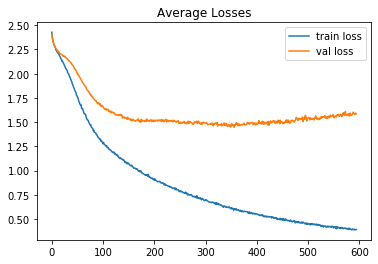

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2008.81s
Epoch: 601


100%|██████████| 727/727 [00:02<00:00, 246.92it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 602


100%|██████████| 727/727 [00:02<00:00, 256.91it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 603


100%|██████████| 727/727 [00:02<00:00, 261.74it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 604


100%|██████████| 727/727 [00:02<00:00, 260.14it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 605


100%|██████████| 727/727 [00:02<00:00, 256.36it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 606


100%|██████████| 727/727 [00:02<00:00, 251.71it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 607


100%|██████████| 727/727 [00:02<00:00, 256.13it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 608


100%|██████████| 727/727 [00:02<00:00, 257.24it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 609


100%|██████████| 727/727 [00:02<00:00, 256.17it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 610


100%|██████████| 727/727 [00:02<00:00, 256.32it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 611


100%|██████████| 727/727 [00:02<00:00, 254.77it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 612


100%|██████████| 727/727 [00:02<00:00, 259.63it/s]

training_avg_loss=0.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 613


100%|██████████| 727/727 [00:02<00:00, 261.12it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 614


100%|██████████| 727/727 [00:02<00:00, 256.71it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 615


100%|██████████| 727/727 [00:02<00:00, 258.53it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 616


100%|██████████| 727/727 [00:02<00:00, 257.60it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 617


100%|██████████| 727/727 [00:02<00:00, 261.26it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 618


100%|██████████| 727/727 [00:02<00:00, 255.00it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 619


100%|██████████| 727/727 [00:02<00:00, 258.21it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 620


100%|██████████| 727/727 [00:02<00:00, 263.38it/s]

training_avg_loss=0.38



val_avg_loss=1.59



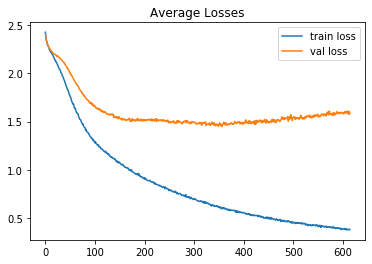

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2077.82s
Epoch: 621


100%|██████████| 727/727 [00:02<00:00, 256.65it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 622


100%|██████████| 727/727 [00:02<00:00, 259.46it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 623


100%|██████████| 727/727 [00:02<00:00, 252.69it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 624


100%|██████████| 727/727 [00:02<00:00, 258.33it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 625


100%|██████████| 727/727 [00:02<00:00, 255.54it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 626


100%|██████████| 727/727 [00:02<00:00, 258.14it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 627


100%|██████████| 727/727 [00:02<00:00, 256.13it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 628


100%|██████████| 727/727 [00:02<00:00, 255.02it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 629


100%|██████████| 727/727 [00:02<00:00, 257.95it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 630


100%|██████████| 727/727 [00:02<00:00, 262.55it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 631


100%|██████████| 727/727 [00:02<00:00, 257.93it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 632


100%|██████████| 727/727 [00:02<00:00, 258.05it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 633


100%|██████████| 727/727 [00:02<00:00, 255.14it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 634


100%|██████████| 727/727 [00:02<00:00, 263.83it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 635


100%|██████████| 727/727 [00:02<00:00, 257.87it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 636


100%|██████████| 727/727 [00:02<00:00, 255.81it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 637


100%|██████████| 727/727 [00:02<00:00, 253.46it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.58

Epoch: 638


100%|██████████| 727/727 [00:02<00:00, 256.68it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 639


100%|██████████| 727/727 [00:02<00:00, 258.99it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.59

Epoch: 640


100%|██████████| 727/727 [00:02<00:00, 259.66it/s]

training_avg_loss=0.36



val_avg_loss=1.62



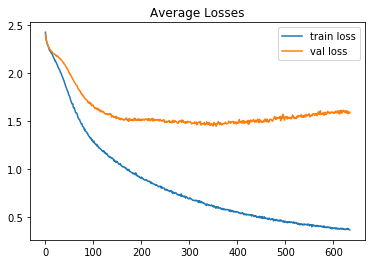

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2146.82s
Epoch: 641


100%|██████████| 727/727 [00:02<00:00, 253.62it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 642


100%|██████████| 727/727 [00:02<00:00, 252.80it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 643


100%|██████████| 727/727 [00:02<00:00, 255.40it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.60

Epoch: 644


100%|██████████| 727/727 [00:02<00:00, 255.33it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 645


100%|██████████| 727/727 [00:02<00:00, 250.54it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 646


100%|██████████| 727/727 [00:02<00:00, 247.57it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 647


100%|██████████| 727/727 [00:02<00:00, 255.61it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 648


100%|██████████| 727/727 [00:02<00:00, 255.66it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 649


100%|██████████| 727/727 [00:02<00:00, 255.70it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 650


100%|██████████| 727/727 [00:02<00:00, 254.85it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 651


100%|██████████| 727/727 [00:02<00:00, 256.72it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 652


100%|██████████| 727/727 [00:02<00:00, 255.31it/s]

training_avg_loss=0.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 653


100%|██████████| 727/727 [00:02<00:00, 253.84it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 654


100%|██████████| 727/727 [00:02<00:00, 254.81it/s]

training_avg_loss=0.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 655


100%|██████████| 727/727 [00:02<00:00, 254.12it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 656


100%|██████████| 727/727 [00:02<00:00, 255.74it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 657


100%|██████████| 727/727 [00:02<00:00, 256.82it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 658


100%|██████████| 727/727 [00:02<00:00, 255.12it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 659


100%|██████████| 727/727 [00:02<00:00, 253.78it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 660


100%|██████████| 727/727 [00:02<00:00, 258.19it/s]

training_avg_loss=0.36



val_avg_loss=1.64



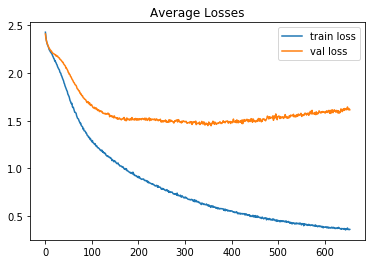

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2216.54s
Epoch: 661


100%|██████████| 727/727 [00:03<00:00, 234.69it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 662


100%|██████████| 727/727 [00:02<00:00, 260.31it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 663


100%|██████████| 727/727 [00:02<00:00, 258.47it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 664


100%|██████████| 727/727 [00:02<00:00, 254.40it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 665


100%|██████████| 727/727 [00:02<00:00, 256.38it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 666


100%|██████████| 727/727 [00:02<00:00, 257.67it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 667


100%|██████████| 727/727 [00:02<00:00, 258.16it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 668


100%|██████████| 727/727 [00:02<00:00, 262.27it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 669


100%|██████████| 727/727 [00:02<00:00, 257.30it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 670


100%|██████████| 727/727 [00:02<00:00, 256.40it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 671


100%|██████████| 727/727 [00:02<00:00, 256.87it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 672


100%|██████████| 727/727 [00:02<00:00, 257.72it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 673


100%|██████████| 727/727 [00:02<00:00, 256.93it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 674


100%|██████████| 727/727 [00:02<00:00, 253.08it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 675


100%|██████████| 727/727 [00:02<00:00, 255.66it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 676


100%|██████████| 727/727 [00:02<00:00, 256.68it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 677


100%|██████████| 727/727 [00:02<00:00, 259.86it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 678


100%|██████████| 727/727 [00:02<00:00, 258.49it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 679


100%|██████████| 727/727 [00:02<00:00, 256.62it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 680


100%|██████████| 727/727 [00:02<00:00, 258.49it/s]

training_avg_loss=0.34



val_avg_loss=1.65



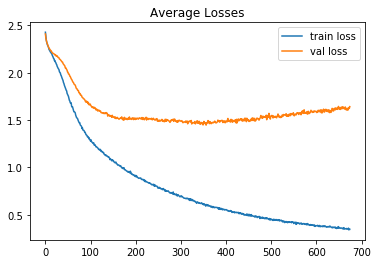

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2286.07s
Epoch: 681


100%|██████████| 727/727 [00:02<00:00, 258.19it/s]

training_avg_loss=0.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 682


100%|██████████| 727/727 [00:02<00:00, 256.74it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 683


100%|██████████| 727/727 [00:02<00:00, 258.08it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 684


100%|██████████| 727/727 [00:02<00:00, 253.98it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 685


100%|██████████| 727/727 [00:02<00:00, 257.40it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.61

Epoch: 686


100%|██████████| 727/727 [00:02<00:00, 257.90it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 687


100%|██████████| 727/727 [00:02<00:00, 251.86it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 688


100%|██████████| 727/727 [00:02<00:00, 256.16it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 689


100%|██████████| 727/727 [00:02<00:00, 257.11it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 690


100%|██████████| 727/727 [00:02<00:00, 258.91it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 691


100%|██████████| 727/727 [00:02<00:00, 256.28it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 692


100%|██████████| 727/727 [00:02<00:00, 256.82it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 693


100%|██████████| 727/727 [00:02<00:00, 261.03it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 694


100%|██████████| 727/727 [00:02<00:00, 254.23it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 695


100%|██████████| 727/727 [00:02<00:00, 255.37it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 696


100%|██████████| 727/727 [00:02<00:00, 254.77it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 697


100%|██████████| 727/727 [00:02<00:00, 259.06it/s]

training_avg_loss=0.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 698


100%|██████████| 727/727 [00:02<00:00, 254.42it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 699


100%|██████████| 727/727 [00:02<00:00, 259.96it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 700


100%|██████████| 727/727 [00:02<00:00, 257.90it/s]

training_avg_loss=0.34



val_avg_loss=1.64



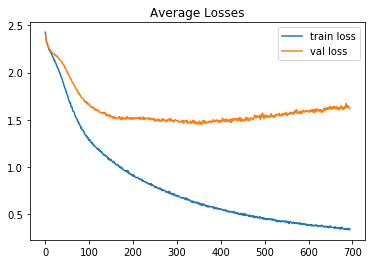

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2355.29s
Epoch: 701


100%|██████████| 727/727 [00:02<00:00, 255.86it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 702


100%|██████████| 727/727 [00:02<00:00, 258.18it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 703


100%|██████████| 727/727 [00:02<00:00, 256.28it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.62

Epoch: 704


100%|██████████| 727/727 [00:02<00:00, 256.63it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 705


100%|██████████| 727/727 [00:02<00:00, 255.99it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 706


100%|██████████| 727/727 [00:02<00:00, 257.93it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 707


100%|██████████| 727/727 [00:02<00:00, 257.03it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.63

Epoch: 708


100%|██████████| 727/727 [00:02<00:00, 249.27it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 709


100%|██████████| 727/727 [00:02<00:00, 254.79it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 710


100%|██████████| 727/727 [00:02<00:00, 254.42it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 711


100%|██████████| 727/727 [00:02<00:00, 248.08it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 712


100%|██████████| 727/727 [00:02<00:00, 255.31it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 713


100%|██████████| 727/727 [00:02<00:00, 258.36it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 714


100%|██████████| 727/727 [00:02<00:00, 259.60it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 715


100%|██████████| 727/727 [00:02<00:00, 256.37it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 716


100%|██████████| 727/727 [00:02<00:00, 257.05it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 717


100%|██████████| 727/727 [00:02<00:00, 264.18it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 718


100%|██████████| 727/727 [00:02<00:00, 259.91it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 719


100%|██████████| 727/727 [00:02<00:00, 262.04it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 720


100%|██████████| 727/727 [00:02<00:00, 257.11it/s]

training_avg_loss=0.33



val_avg_loss=1.66



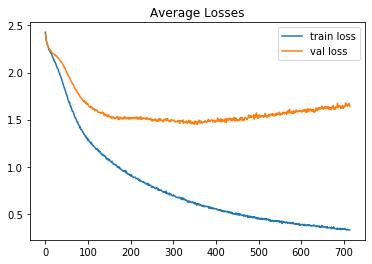

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2424.61s
Epoch: 721


100%|██████████| 727/727 [00:02<00:00, 255.10it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 722


100%|██████████| 727/727 [00:02<00:00, 258.17it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 723


100%|██████████| 727/727 [00:02<00:00, 258.46it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 724


100%|██████████| 727/727 [00:02<00:00, 254.21it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 725


100%|██████████| 727/727 [00:02<00:00, 254.19it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 726


100%|██████████| 727/727 [00:02<00:00, 258.85it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 727


100%|██████████| 727/727 [00:02<00:00, 258.28it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 728


100%|██████████| 727/727 [00:02<00:00, 255.13it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 729


100%|██████████| 727/727 [00:02<00:00, 252.10it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.64

Epoch: 730


100%|██████████| 727/727 [00:02<00:00, 252.57it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 731


100%|██████████| 727/727 [00:02<00:00, 255.83it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 732


100%|██████████| 727/727 [00:02<00:00, 257.57it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 733


100%|██████████| 727/727 [00:02<00:00, 259.69it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 734


100%|██████████| 727/727 [00:02<00:00, 252.57it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 735


100%|██████████| 727/727 [00:02<00:00, 325.33it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 736


100%|██████████| 727/727 [00:02<00:00, 255.46it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 737


100%|██████████| 727/727 [00:02<00:00, 252.92it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 738


100%|██████████| 727/727 [00:02<00:00, 257.43it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 739


100%|██████████| 727/727 [00:02<00:00, 261.89it/s]

training_avg_loss=0.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 740


100%|██████████| 727/727 [00:02<00:00, 252.96it/s]

training_avg_loss=0.32



val_avg_loss=1.66



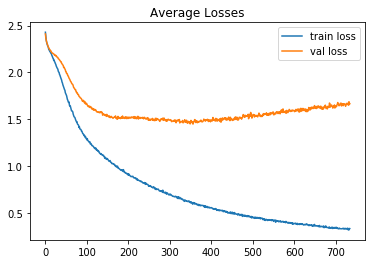

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2493.99s
Epoch: 741


100%|██████████| 727/727 [00:02<00:00, 253.59it/s]

training_avg_loss=0.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 742


100%|██████████| 727/727 [00:02<00:00, 260.41it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 743


100%|██████████| 727/727 [00:02<00:00, 258.12it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 744


100%|██████████| 727/727 [00:02<00:00, 261.82it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 745


100%|██████████| 727/727 [00:02<00:00, 252.37it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 746


100%|██████████| 727/727 [00:02<00:00, 257.69it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 747


100%|██████████| 727/727 [00:02<00:00, 250.13it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 748


100%|██████████| 727/727 [00:02<00:00, 255.88it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 749


100%|██████████| 727/727 [00:02<00:00, 256.57it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 750


100%|██████████| 727/727 [00:02<00:00, 253.37it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 751


100%|██████████| 727/727 [00:02<00:00, 253.01it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 752


100%|██████████| 727/727 [00:02<00:00, 256.21it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 753


100%|██████████| 727/727 [00:02<00:00, 257.85it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 754


100%|██████████| 727/727 [00:02<00:00, 253.71it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 755


100%|██████████| 727/727 [00:02<00:00, 253.83it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 756


100%|██████████| 727/727 [00:02<00:00, 253.55it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 757


100%|██████████| 727/727 [00:02<00:00, 262.44it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 758


100%|██████████| 727/727 [00:02<00:00, 257.60it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 759


100%|██████████| 727/727 [00:02<00:00, 252.03it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 760


100%|██████████| 727/727 [00:02<00:00, 256.92it/s]

training_avg_loss=0.32



val_avg_loss=1.69



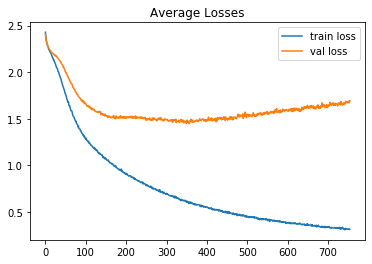

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2563.50s
Epoch: 761


100%|██████████| 727/727 [00:02<00:00, 258.82it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 762


100%|██████████| 727/727 [00:02<00:00, 259.26it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 763


100%|██████████| 727/727 [00:02<00:00, 258.59it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 764


100%|██████████| 727/727 [00:02<00:00, 257.64it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 765


100%|██████████| 727/727 [00:02<00:00, 256.65it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 766


100%|██████████| 727/727 [00:02<00:00, 254.84it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 767


100%|██████████| 727/727 [00:02<00:00, 255.82it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 768


100%|██████████| 727/727 [00:02<00:00, 256.48it/s]

training_avg_loss=0.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.65

Epoch: 769


100%|██████████| 727/727 [00:02<00:00, 254.78it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 770


100%|██████████| 727/727 [00:02<00:00, 254.74it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 771


100%|██████████| 727/727 [00:02<00:00, 257.40it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 772


100%|██████████| 727/727 [00:02<00:00, 264.52it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 773


100%|██████████| 727/727 [00:02<00:00, 262.71it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 774


100%|██████████| 727/727 [00:02<00:00, 257.97it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 775


100%|██████████| 727/727 [00:02<00:00, 259.16it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 776


100%|██████████| 727/727 [00:02<00:00, 261.81it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 777


100%|██████████| 727/727 [00:02<00:00, 256.87it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 778


100%|██████████| 727/727 [00:02<00:00, 250.72it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 779


100%|██████████| 727/727 [00:02<00:00, 255.31it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.66

Epoch: 780


100%|██████████| 727/727 [00:02<00:00, 252.56it/s]

training_avg_loss=0.31



val_avg_loss=1.65



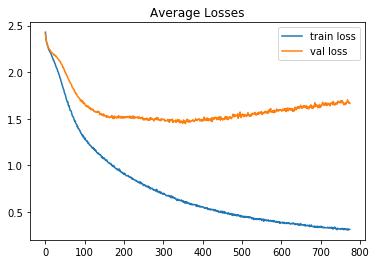

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2632.90s
Epoch: 781


100%|██████████| 727/727 [00:02<00:00, 254.00it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 782


100%|██████████| 727/727 [00:02<00:00, 256.82it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 783


100%|██████████| 727/727 [00:02<00:00, 258.20it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.67

Epoch: 784


100%|██████████| 727/727 [00:02<00:00, 260.93it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 785


100%|██████████| 727/727 [00:02<00:00, 250.23it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 786


100%|██████████| 727/727 [00:02<00:00, 253.87it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 787


100%|██████████| 727/727 [00:02<00:00, 255.77it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 788


100%|██████████| 727/727 [00:02<00:00, 252.99it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 789


100%|██████████| 727/727 [00:02<00:00, 254.12it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.68

Epoch: 790


100%|██████████| 727/727 [00:02<00:00, 252.09it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 791


100%|██████████| 727/727 [00:02<00:00, 258.65it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 792


100%|██████████| 727/727 [00:02<00:00, 258.94it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 793


100%|██████████| 727/727 [00:02<00:00, 258.39it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 794


100%|██████████| 727/727 [00:02<00:00, 263.71it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 795


100%|██████████| 727/727 [00:02<00:00, 252.31it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 796


100%|██████████| 727/727 [00:02<00:00, 255.40it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 797


100%|██████████| 727/727 [00:02<00:00, 256.76it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 798


100%|██████████| 727/727 [00:02<00:00, 258.30it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 799


100%|██████████| 727/727 [00:02<00:00, 259.31it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 800


100%|██████████| 727/727 [00:02<00:00, 260.04it/s]

training_avg_loss=0.30



val_avg_loss=1.72



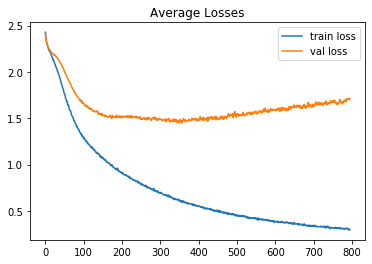

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2702.24s
Epoch: 801


100%|██████████| 727/727 [00:02<00:00, 250.10it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 802


100%|██████████| 727/727 [00:02<00:00, 251.86it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 803


100%|██████████| 727/727 [00:02<00:00, 252.62it/s]

training_avg_loss=0.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 804


100%|██████████| 727/727 [00:02<00:00, 258.35it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 805


100%|██████████| 727/727 [00:02<00:00, 258.70it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 806


100%|██████████| 727/727 [00:02<00:00, 255.38it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 807


100%|██████████| 727/727 [00:02<00:00, 264.39it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 808


100%|██████████| 727/727 [00:02<00:00, 256.67it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 809


100%|██████████| 727/727 [00:02<00:00, 255.84it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 810


100%|██████████| 727/727 [00:02<00:00, 258.27it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 811


100%|██████████| 727/727 [00:02<00:00, 255.24it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 812


100%|██████████| 727/727 [00:02<00:00, 257.40it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 813


100%|██████████| 727/727 [00:02<00:00, 259.71it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 814


100%|██████████| 727/727 [00:02<00:00, 259.04it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 815


100%|██████████| 727/727 [00:02<00:00, 257.85it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 816


100%|██████████| 727/727 [00:02<00:00, 260.02it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 817


100%|██████████| 727/727 [00:02<00:00, 257.89it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 818


100%|██████████| 727/727 [00:02<00:00, 260.08it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 819


100%|██████████| 727/727 [00:02<00:00, 254.35it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 820


100%|██████████| 727/727 [00:02<00:00, 255.43it/s]

training_avg_loss=0.30



val_avg_loss=1.71



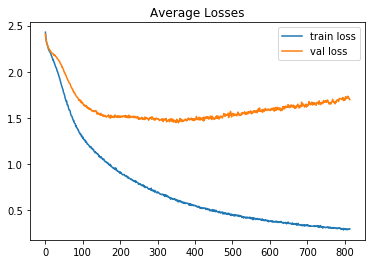

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2771.63s
Epoch: 821


100%|██████████| 727/727 [00:02<00:00, 256.69it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 822


100%|██████████| 727/727 [00:02<00:00, 248.01it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 823


100%|██████████| 727/727 [00:02<00:00, 251.54it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 824


100%|██████████| 727/727 [00:02<00:00, 259.65it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 825


100%|██████████| 727/727 [00:02<00:00, 315.06it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 826


100%|██████████| 727/727 [00:02<00:00, 255.16it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 827


100%|██████████| 727/727 [00:02<00:00, 257.11it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 828


100%|██████████| 727/727 [00:02<00:00, 258.84it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 829


100%|██████████| 727/727 [00:02<00:00, 252.78it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 830


100%|██████████| 727/727 [00:02<00:00, 253.89it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.69

Epoch: 831


100%|██████████| 727/727 [00:02<00:00, 261.14it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 832


100%|██████████| 727/727 [00:02<00:00, 255.08it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 833


100%|██████████| 727/727 [00:02<00:00, 256.22it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 834


100%|██████████| 727/727 [00:02<00:00, 252.49it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 835


100%|██████████| 727/727 [00:02<00:00, 257.08it/s]

training_avg_loss=0.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 836


100%|██████████| 727/727 [00:02<00:00, 253.00it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 837


100%|██████████| 727/727 [00:02<00:00, 255.68it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 838


100%|██████████| 727/727 [00:02<00:00, 261.17it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 839


100%|██████████| 727/727 [00:02<00:00, 256.87it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 840


100%|██████████| 727/727 [00:02<00:00, 253.78it/s]

training_avg_loss=0.29



val_avg_loss=1.72



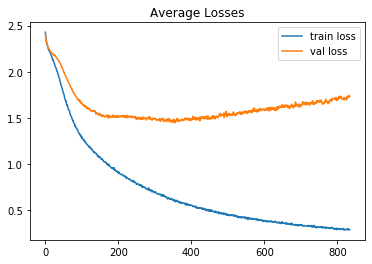

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2841.26s
Epoch: 841


100%|██████████| 727/727 [00:02<00:00, 249.25it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 842


100%|██████████| 727/727 [00:02<00:00, 257.23it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 843


100%|██████████| 727/727 [00:02<00:00, 258.11it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 844


100%|██████████| 727/727 [00:02<00:00, 258.25it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 845


100%|██████████| 727/727 [00:02<00:00, 259.11it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.71

Epoch: 846


100%|██████████| 727/727 [00:02<00:00, 258.84it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 847


100%|██████████| 727/727 [00:02<00:00, 250.49it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 848


100%|██████████| 727/727 [00:02<00:00, 254.53it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 849


100%|██████████| 727/727 [00:02<00:00, 256.06it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.70

Epoch: 850


100%|██████████| 727/727 [00:02<00:00, 260.09it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 851


100%|██████████| 727/727 [00:02<00:00, 262.13it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 852


100%|██████████| 727/727 [00:02<00:00, 263.99it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 853


100%|██████████| 727/727 [00:02<00:00, 253.57it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 854


100%|██████████| 727/727 [00:02<00:00, 257.12it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 855


100%|██████████| 727/727 [00:02<00:00, 255.12it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 856


100%|██████████| 727/727 [00:02<00:00, 252.86it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 857


100%|██████████| 727/727 [00:02<00:00, 255.90it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 858


100%|██████████| 727/727 [00:02<00:00, 256.17it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 859


100%|██████████| 727/727 [00:02<00:00, 259.09it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 860


100%|██████████| 727/727 [00:02<00:00, 256.13it/s]

training_avg_loss=0.28



val_avg_loss=1.73



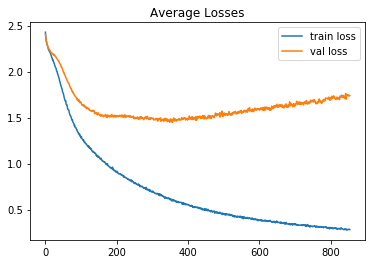

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2910.63s
Epoch: 861


100%|██████████| 727/727 [00:02<00:00, 254.44it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 862


100%|██████████| 727/727 [00:02<00:00, 255.18it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 863


100%|██████████| 727/727 [00:02<00:00, 249.64it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 864


100%|██████████| 727/727 [00:02<00:00, 256.27it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 865


100%|██████████| 727/727 [00:02<00:00, 257.76it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 866


100%|██████████| 727/727 [00:02<00:00, 255.87it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 867


100%|██████████| 727/727 [00:02<00:00, 253.19it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 868


100%|██████████| 727/727 [00:02<00:00, 259.64it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 869


100%|██████████| 727/727 [00:02<00:00, 255.99it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 870


100%|██████████| 727/727 [00:02<00:00, 260.72it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 871


100%|██████████| 727/727 [00:02<00:00, 259.41it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 872


100%|██████████| 727/727 [00:02<00:00, 259.78it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 873


100%|██████████| 727/727 [00:02<00:00, 258.82it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 874


100%|██████████| 727/727 [00:02<00:00, 253.95it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 875


100%|██████████| 727/727 [00:02<00:00, 257.41it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 876


100%|██████████| 727/727 [00:02<00:00, 261.36it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 877


100%|██████████| 727/727 [00:02<00:00, 254.57it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 878


100%|██████████| 727/727 [00:02<00:00, 257.41it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 879


100%|██████████| 727/727 [00:02<00:00, 259.10it/s]

training_avg_loss=0.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 880


100%|██████████| 727/727 [00:02<00:00, 257.76it/s]

training_avg_loss=0.28



val_avg_loss=1.73



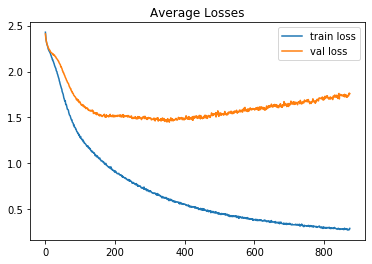

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 2979.95s
Epoch: 881


100%|██████████| 727/727 [00:02<00:00, 254.83it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.72

Epoch: 882


100%|██████████| 727/727 [00:02<00:00, 255.65it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 883


100%|██████████| 727/727 [00:02<00:00, 258.80it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 884


100%|██████████| 727/727 [00:02<00:00, 261.68it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 885


100%|██████████| 727/727 [00:02<00:00, 255.38it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 886


100%|██████████| 727/727 [00:02<00:00, 254.27it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 887


100%|██████████| 727/727 [00:02<00:00, 252.62it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 888


100%|██████████| 727/727 [00:02<00:00, 259.28it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 889


100%|██████████| 727/727 [00:02<00:00, 259.91it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 890


100%|██████████| 727/727 [00:02<00:00, 257.82it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 891


100%|██████████| 727/727 [00:02<00:00, 261.03it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.73

Epoch: 892


100%|██████████| 727/727 [00:02<00:00, 319.90it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 893


100%|██████████| 727/727 [00:02<00:00, 252.78it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 894


100%|██████████| 727/727 [00:02<00:00, 255.26it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 895


100%|██████████| 727/727 [00:02<00:00, 255.02it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 896


100%|██████████| 727/727 [00:02<00:00, 255.58it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 897


100%|██████████| 727/727 [00:02<00:00, 256.08it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.74

Epoch: 898


100%|██████████| 727/727 [00:02<00:00, 256.69it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 899


100%|██████████| 727/727 [00:02<00:00, 257.27it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 900


100%|██████████| 727/727 [00:02<00:00, 262.63it/s]

training_avg_loss=0.27



val_avg_loss=1.77



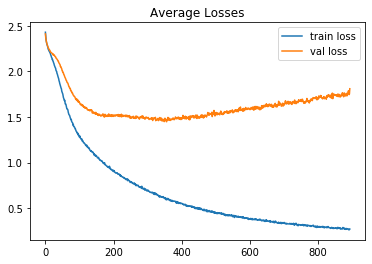

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3049.38s
Epoch: 901


100%|██████████| 727/727 [00:02<00:00, 254.88it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 902


100%|██████████| 727/727 [00:02<00:00, 256.65it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 903


100%|██████████| 727/727 [00:02<00:00, 252.99it/s]

training_avg_loss=0.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 904


100%|██████████| 727/727 [00:02<00:00, 257.28it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 905


100%|██████████| 727/727 [00:02<00:00, 256.89it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 906


100%|██████████| 727/727 [00:02<00:00, 257.04it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 907


100%|██████████| 727/727 [00:02<00:00, 257.00it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 908


100%|██████████| 727/727 [00:02<00:00, 256.90it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 909


100%|██████████| 727/727 [00:02<00:00, 255.62it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 910


100%|██████████| 727/727 [00:02<00:00, 253.57it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 911


100%|██████████| 727/727 [00:02<00:00, 259.23it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 912


100%|██████████| 727/727 [00:02<00:00, 256.64it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 913


100%|██████████| 727/727 [00:02<00:00, 254.74it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 914


100%|██████████| 727/727 [00:02<00:00, 257.63it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 915


100%|██████████| 727/727 [00:02<00:00, 259.47it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 916


100%|██████████| 727/727 [00:02<00:00, 256.11it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 917


100%|██████████| 727/727 [00:02<00:00, 255.10it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 918


100%|██████████| 727/727 [00:02<00:00, 254.13it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 919


100%|██████████| 727/727 [00:02<00:00, 266.81it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.77

Epoch: 920


100%|██████████| 727/727 [00:02<00:00, 260.59it/s]

training_avg_loss=0.26



val_avg_loss=1.78



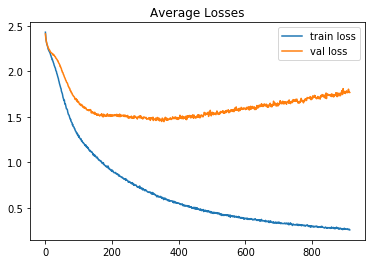

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3119.06s
Epoch: 921


100%|██████████| 727/727 [00:02<00:00, 252.62it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 922


100%|██████████| 727/727 [00:02<00:00, 257.27it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 923


100%|██████████| 727/727 [00:02<00:00, 259.74it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 924


100%|██████████| 727/727 [00:02<00:00, 254.40it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 925


100%|██████████| 727/727 [00:02<00:00, 256.99it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 926


100%|██████████| 727/727 [00:02<00:00, 257.85it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 927


100%|██████████| 727/727 [00:02<00:00, 257.92it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 928


100%|██████████| 727/727 [00:02<00:00, 257.80it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 929


100%|██████████| 727/727 [00:02<00:00, 260.38it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.75

Epoch: 930


100%|██████████| 727/727 [00:02<00:00, 259.31it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 931


100%|██████████| 727/727 [00:02<00:00, 259.43it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 932


100%|██████████| 727/727 [00:02<00:00, 255.36it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 933


100%|██████████| 727/727 [00:02<00:00, 255.86it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.76

Epoch: 934


100%|██████████| 727/727 [00:02<00:00, 258.59it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 935


100%|██████████| 727/727 [00:02<00:00, 254.59it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 936


100%|██████████| 727/727 [00:02<00:00, 259.04it/s]

training_avg_loss=0.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 937


100%|██████████| 727/727 [00:02<00:00, 255.30it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 938


100%|██████████| 727/727 [00:02<00:00, 257.02it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 939


100%|██████████| 727/727 [00:02<00:00, 255.75it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 940


100%|██████████| 727/727 [00:02<00:00, 255.66it/s]

training_avg_loss=0.26



val_avg_loss=1.81



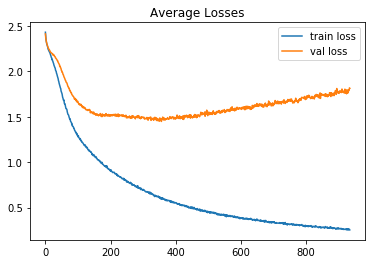

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3188.49s
Epoch: 941


100%|██████████| 727/727 [00:02<00:00, 257.53it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 942


100%|██████████| 727/727 [00:02<00:00, 258.37it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 943


100%|██████████| 727/727 [00:02<00:00, 256.55it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 944


100%|██████████| 727/727 [00:02<00:00, 247.46it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 945


100%|██████████| 727/727 [00:02<00:00, 264.11it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 946


100%|██████████| 727/727 [00:02<00:00, 249.20it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 947


100%|██████████| 727/727 [00:02<00:00, 256.28it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 948


100%|██████████| 727/727 [00:02<00:00, 256.28it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 949


100%|██████████| 727/727 [00:02<00:00, 261.28it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 950


100%|██████████| 727/727 [00:02<00:00, 252.33it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 951


100%|██████████| 727/727 [00:02<00:00, 257.08it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 952


100%|██████████| 727/727 [00:02<00:00, 258.24it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 953


100%|██████████| 727/727 [00:02<00:00, 255.21it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 954


100%|██████████| 727/727 [00:02<00:00, 253.42it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 955


100%|██████████| 727/727 [00:02<00:00, 258.23it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 956


100%|██████████| 727/727 [00:02<00:00, 258.24it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.78

Epoch: 957


100%|██████████| 727/727 [00:02<00:00, 258.77it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 958


100%|██████████| 727/727 [00:02<00:00, 259.21it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 959


100%|██████████| 727/727 [00:02<00:00, 257.09it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 960


100%|██████████| 727/727 [00:02<00:00, 252.29it/s]

training_avg_loss=0.25



val_avg_loss=1.80



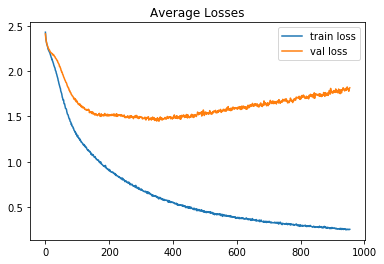

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3258.44s
Epoch: 961


100%|██████████| 727/727 [00:02<00:00, 259.26it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 962


100%|██████████| 727/727 [00:02<00:00, 258.03it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 963


100%|██████████| 727/727 [00:02<00:00, 256.80it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 964


100%|██████████| 727/727 [00:02<00:00, 249.33it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 965


100%|██████████| 727/727 [00:02<00:00, 256.77it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.80

Epoch: 966


100%|██████████| 727/727 [00:02<00:00, 258.04it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 967


100%|██████████| 727/727 [00:02<00:00, 258.14it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.79

Epoch: 968


100%|██████████| 727/727 [00:02<00:00, 259.47it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 969


100%|██████████| 727/727 [00:02<00:00, 256.21it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 970


100%|██████████| 727/727 [00:02<00:00, 256.45it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 971


100%|██████████| 727/727 [00:02<00:00, 257.00it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 972


100%|██████████| 727/727 [00:02<00:00, 256.65it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 973


100%|██████████| 727/727 [00:02<00:00, 257.87it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 974


100%|██████████| 727/727 [00:02<00:00, 250.98it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 975


100%|██████████| 727/727 [00:02<00:00, 260.69it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 976


100%|██████████| 727/727 [00:02<00:00, 255.52it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 977


100%|██████████| 727/727 [00:02<00:00, 257.54it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 978


100%|██████████| 727/727 [00:02<00:00, 264.85it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 979


100%|██████████| 727/727 [00:02<00:00, 256.48it/s]

training_avg_loss=0.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 980


100%|██████████| 727/727 [00:02<00:00, 267.29it/s]

training_avg_loss=0.25



val_avg_loss=1.80



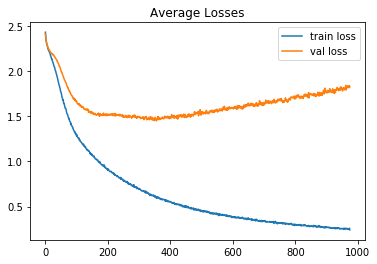

  0%|          | 0/727 [00:00<?, ?it/s]

Training finished in 3328.22s
Epoch: 981


100%|██████████| 727/727 [00:02<00:00, 255.52it/s]

training_avg_loss=0.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 982


100%|██████████| 727/727 [00:02<00:00, 259.87it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 983


100%|██████████| 727/727 [00:02<00:00, 249.40it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 984


100%|██████████| 727/727 [00:02<00:00, 257.58it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 985


100%|██████████| 727/727 [00:02<00:00, 249.61it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 986


100%|██████████| 727/727 [00:02<00:00, 255.32it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 987


100%|██████████| 727/727 [00:02<00:00, 254.14it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.81

Epoch: 988


100%|██████████| 727/727 [00:02<00:00, 256.67it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.82

Epoch: 989


100%|██████████| 727/727 [00:02<00:00, 252.34it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.86

Epoch: 990


100%|██████████| 727/727 [00:02<00:00, 251.54it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 991


100%|██████████| 727/727 [00:02<00:00, 258.67it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 992


100%|██████████| 727/727 [00:02<00:00, 251.67it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 993


100%|██████████| 727/727 [00:02<00:00, 255.13it/s]

training_avg_loss=0.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.83

Epoch: 994


100%|██████████| 727/727 [00:02<00:00, 254.18it/s]

training_avg_loss=0.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.85

Epoch: 995


100%|██████████| 727/727 [00:02<00:00, 254.48it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 996


100%|██████████| 727/727 [00:02<00:00, 246.96it/s]

training_avg_loss=0.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.85

Epoch: 997


100%|██████████| 727/727 [00:02<00:00, 253.36it/s]

training_avg_loss=0.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.85

Epoch: 998


100%|██████████| 727/727 [00:02<00:00, 257.25it/s]

training_avg_loss=0.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1.84

Epoch: 999


100%|██████████| 727/727 [00:02<00:00, 256.88it/s]

training_avg_loss=0.24



val_avg_loss=1.86



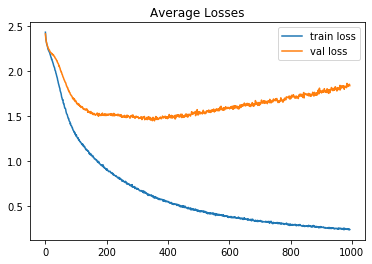

Training finished in 3395.14s


In [5]:
model_name = 'supervised_timbre'
input = 'mel_cut'
epochs = 1000


train_dataset, train_dataloader, val_dataset, val_dataloader = build_dataloader.build_dataset(input, model_name)
print('Number of files in the training dataset:', len(train_dataset))
print('Number of files in the validation dataset:', len(val_dataset))

# show configs
configs.show_configs(model=model_name)

# import model
model = model_utils.import_model(model_name, input)

# show model
model_utils.show_model(model, input)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=configs.ParamsConfig.LEARNING_RATE, weight_decay=1e-5)

print('Start training model on', device, '...')

train_loss = []
val_loss = []
training_start_time = time.time()
for epoch in range(epochs):
    model.train()

    train_loss.append(0)
    num_batches = 0

    pbar = tqdm(total=len(train_dataloader))
    print("Epoch:", epoch)

    for image_batch, y in train_dataloader:
        image_batch = image_batch.to(device, dtype=torch.float)
        y = y.to(device, dtype=torch.long)

        # vae reconstruction
        y_train_pred = model(image_batch)

        # reconstruction error
        total_loss = criterion(y_train_pred, y)

        # backpropagation
        optimizer.zero_grad()
        total_loss.backward()

        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()

        train_loss[-1] += total_loss.item()
        num_batches += 1

        pbar.update()

    train_loss[-1] /= num_batches

    pbar.close()

    print("training_avg_loss={:.2f}\n".format(train_loss[-1]))

    model.eval()
    val_loss.append(0)
    num_batches = 0
    with torch.no_grad():
        for image_batch, y in val_dataloader:
            image_batch = image_batch.to(device, dtype=torch.float)
            y = y.to(device, dtype=torch.long)
            
            # vae reconstruction
            y_val_pred = model(image_batch)
            
            total_val_loss = criterion(y_val_pred, y)

            val_loss[-1] += total_val_loss.item()
                
            num_batches += 1

    val_loss[-1] /= num_batches

    print("val_avg_loss={:.2f}\n".format(val_loss[-1]))

    checkpoint = {
                    'model': model.state_dict(),
                    'train loss': train_loss,
                    'val loss': val_loss,
                 }



    if not os.path.exists(configs.ParamsConfig.TRAINED_MODELS_PATH):
        os.mkdir(configs.ParamsConfig.TRAINED_MODELS_PATH)

    # save trained model every 10 epochs
    if epoch % 20 == 0 or epoch == epochs-1:
        torch.save(checkpoint,
                    os.path.join(configs.ParamsConfig.TRAINED_MODELS_PATH, 'saved_model_' + str(epoch) + "epochs.pth"))

        plot_utils.plot_supervised_losses(model=model, model_name=model_name, trained_epochs=epoch)

        print("Training finished in {:.2f}s".format(time.time() - training_start_time))